
## Trying with my classifier

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, AveragePooling2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
#PIL for opening,resizing and saving images
from PIL import Image
#tqdm for a progress bar when loading the dataset
from tqdm import tqdm
import numpy as np

Using TensorFlow backend.


In [2]:

# encoding_dim = 32

input_img = Input(shape=(64, 64, 3))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) #16
x = AveragePooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #8
x = AveragePooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
                
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#avgpooling, bigger img, other activation functions (softmax or linear), more padding, fewer layers less non-linear stuff

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
images = np.load('humans_64.npy')

In [4]:
images = images.astype('float32') / 255.
images.shape

(13233, 64, 64, 3)

In [5]:

# images = np.mean(images, axis=3)
x_train = images[0:5000]
x_test = images[5000:6500]
# x_val = images[10000:12500]
x_train = np.reshape(x_train, (len(x_train), 64, 64, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 64, 64, 3))  # adapt this if using `channels_first` image data format
# x_val = np.reshape(x_val, (len(x_val), 64, 64, 3))

In [6]:
print(x_train.shape)
print(x_test.shape)
# print(x_val.shape)

(5000, 64, 64, 3)
(1500, 64, 64, 3)


In [7]:
images=None

In [8]:
import matplotlib.pyplot as plt

In [ ]:
# from keras.applications.resnet50 import ResNet50

# define ResNet50 model
# ResNet50_model_ = ResNet50(weights='imagenet')

In [9]:
from keras.models import load_model
classifier = load_model('../Final-Project/model2-final.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
import tensorflow as ts

In [11]:
# Define custom loss

from keras import losses

def custom_loss(layer):           
     
    def loss(y_true, y_pred):       

        class_pred = classifier(y_pred)

        pred_print = ts.Print(class_pred, [class_pred], 'resnet pred: ')
        
        autoencoder_loss = losses.mean_squared_error(y_true, y_pred)

        autoencoder_mean = ts.math.reduce_mean(autoencoder_loss, [1, 2])
       
        alpha = 1
        final_loss = autoencoder_mean + alpha * (ts.stop_gradient(pred_print))
        
        return final_loss
  
    return loss
    


In [12]:
# Compile the model
doggifier = Model(input_img, decoded)
batch_size= 128

#autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

doggifier.compile(optimizer='adadelta',
              loss=custom_loss(decoded), # Call the loss function with the selected layer
              metrics=['accuracy'])

ypred: Tensor("conv2d_4/Sigmoid:0", shape=(?, ?, ?, 3), dtype=float32)
classif prediction: Tensor("loss_1/conv2d_4_loss/sequential_1/activation_1/Sigmoid:0", shape=(?, 1), dtype=float32)
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`

autoenc_loss:

Running epoch 1/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:49 - loss: 0.5380 - acc: 0.365 - ETA: 1:23 - loss: 0.5479 - acc: 0.367 - ETA: 1:16 - loss: 0.5596 - acc: 0.380 - ETA: 1:12 - loss: 0.5714 - acc: 0.387 - ETA: 1:08 - loss: 0.5832 - acc: 0.388 - ETA: 1:05 - loss: 0.5928 - acc: 0.386 - ETA: 1:02 - loss: 0.6039 - acc: 0.385 - ETA: 59s - loss: 0.6149 - acc: 0.381 - ETA: 57s - loss: 0.6264 - acc: 0.37 - ETA: 55s - loss: 0.6383 - acc: 0.37 - ETA: 53s - loss: 0.6503 - acc: 0.37 - ETA: 51s - loss: 0.6608 - acc: 0.37 - ETA: 48s - loss: 0.6721 - acc: 0.37 - ETA: 46s - loss: 0.6836 - acc: 0.38 - ETA: 44s - loss: 0.6957 - acc: 0.38 - ETA: 42s - loss: 0.7077 - acc: 0.38 - ETA: 41s - loss: 0.7193 - acc: 0.39 - ETA: 38s - loss: 0.7305 - acc: 0.40 - ETA: 36s - loss: 0.7417 - acc: 0.41 - ETA: 35s - loss: 0.7527 - acc: 0.41 - ETA: 33s - loss: 0.7627 - acc: 0.42 - ETA: 31s - loss: 0.7724 - acc: 0.43 - ETA: 29s - loss: 0.7814 - acc: 0.44 - ETA: 28s - loss: 0.7898 - acc: 0.44 -

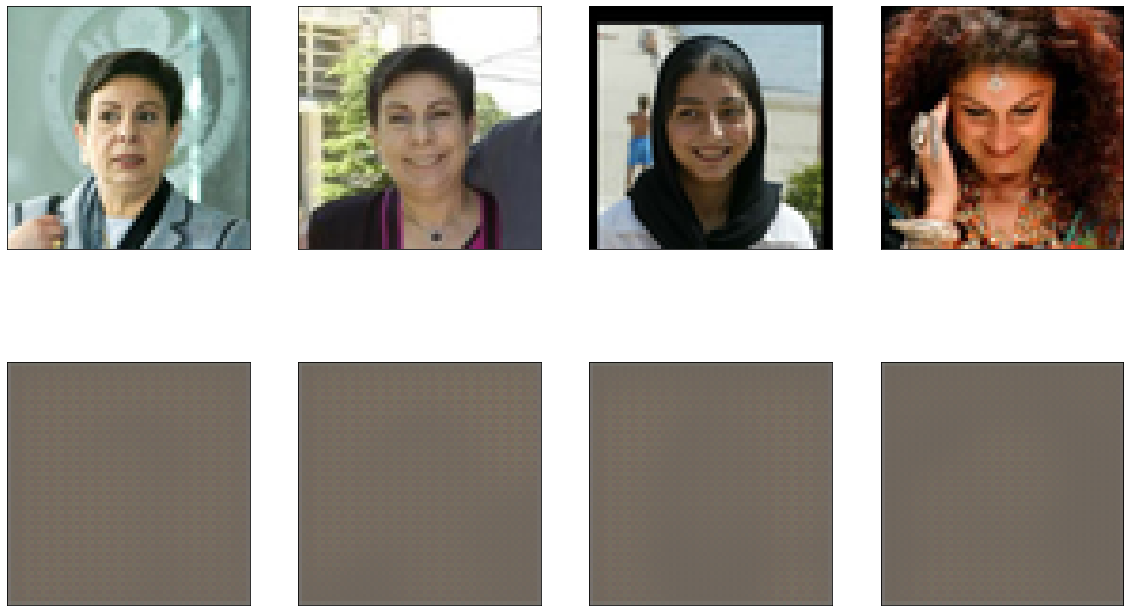

Running epoch 2/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:13 - loss: 0.5934 - acc: 0.639 - ETA: 1:06 - loss: 0.5960 - acc: 0.666 - ETA: 1:04 - loss: 0.5853 - acc: 0.669 - ETA: 1:01 - loss: 0.5818 - acc: 0.665 - ETA: 1:00 - loss: 0.5805 - acc: 0.660 - ETA: 58s - loss: 0.5830 - acc: 0.658 - ETA: 57s - loss: 0.5861 - acc: 0.66 - ETA: 55s - loss: 0.5924 - acc: 0.66 - ETA: 53s - loss: 0.6019 - acc: 0.66 - ETA: 52s - loss: 0.6115 - acc: 0.66 - ETA: 50s - loss: 0.6207 - acc: 0.65 - ETA: 48s - loss: 0.6323 - acc: 0.65 - ETA: 47s - loss: 0.6454 - acc: 0.65 - ETA: 45s - loss: 0.6599 - acc: 0.65 - ETA: 43s - loss: 0.6747 - acc: 0.65 - ETA: 41s - loss: 0.6880 - acc: 0.66 - ETA: 39s - loss: 0.7009 - acc: 0.66 - ETA: 37s - loss: 0.7135 - acc: 0.66 - ETA: 36s - loss: 0.7267 - acc: 0.65 - ETA: 34s - loss: 0.7383 - acc: 0.65 - ETA: 32s - loss: 0.7492 - acc: 0.65 - ETA: 30s - loss: 0.7595 - acc: 0.65 - ETA: 28s - loss: 0.7688 - acc: 0.65 - ETA: 26s - loss: 0.7775 - acc: 0.65 - ETA

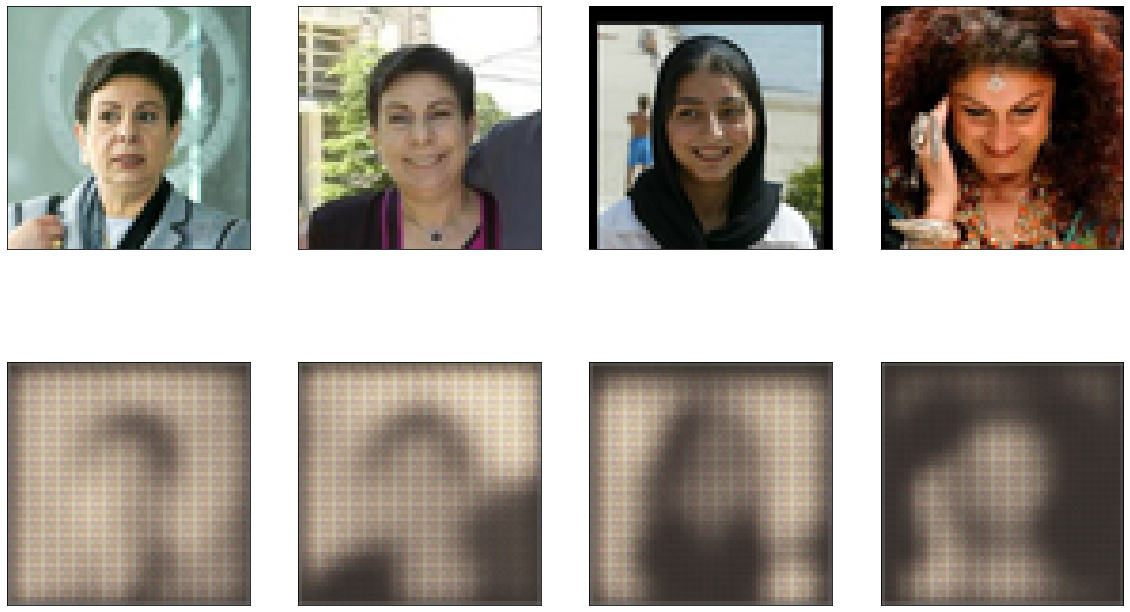

Running epoch 3/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:21 - loss: 0.9494 - acc: 0.658 - ETA: 1:15 - loss: 0.9735 - acc: 0.649 - ETA: 1:12 - loss: 0.9717 - acc: 0.654 - ETA: 1:09 - loss: 0.9757 - acc: 0.651 - ETA: 1:07 - loss: 0.9669 - acc: 0.648 - ETA: 1:04 - loss: 0.9670 - acc: 0.650 - ETA: 1:02 - loss: 0.9538 - acc: 0.651 - ETA: 1:01 - loss: 0.9576 - acc: 0.647 - ETA: 58s - loss: 0.9496 - acc: 0.649 - ETA: 57s - loss: 0.9519 - acc: 0.65 - ETA: 55s - loss: 0.9474 - acc: 0.64 - ETA: 53s - loss: 0.9521 - acc: 0.64 - ETA: 51s - loss: 0.9491 - acc: 0.64 - ETA: 49s - loss: 0.9512 - acc: 0.64 - ETA: 46s - loss: 0.9435 - acc: 0.64 - ETA: 44s - loss: 0.9453 - acc: 0.65 - ETA: 42s - loss: 0.9429 - acc: 0.65 - ETA: 41s - loss: 0.9441 - acc: 0.65 - ETA: 39s - loss: 0.9404 - acc: 0.65 - ETA: 37s - loss: 0.9406 - acc: 0.65 - ETA: 35s - loss: 0.9395 - acc: 0.65 - ETA: 33s - loss: 0.9409 - acc: 0.65 - ETA: 31s - loss: 0.9384 - acc: 0.65 - ETA: 29s - loss: 0.9394 - acc: 0.65

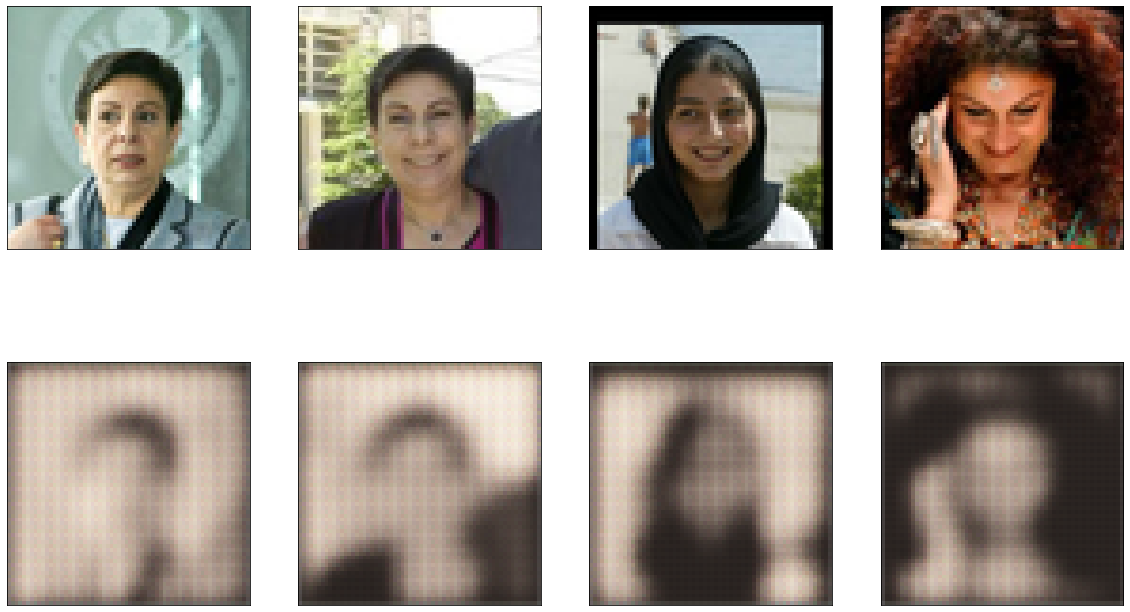

Running epoch 4/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:32 - loss: 0.8837 - acc: 0.683 - ETA: 1:25 - loss: 0.9215 - acc: 0.663 - ETA: 1:18 - loss: 0.9051 - acc: 0.666 - ETA: 1:14 - loss: 0.9205 - acc: 0.658 - ETA: 1:12 - loss: 0.9039 - acc: 0.654 - ETA: 1:09 - loss: 0.9113 - acc: 0.653 - ETA: 1:06 - loss: 0.9094 - acc: 0.651 - ETA: 1:04 - loss: 0.9150 - acc: 0.648 - ETA: 1:01 - loss: 0.9153 - acc: 0.649 - ETA: 59s - loss: 0.9225 - acc: 0.651 - ETA: 56s - loss: 0.9181 - acc: 0.65 - ETA: 54s - loss: 0.9216 - acc: 0.65 - ETA: 52s - loss: 0.9184 - acc: 0.65 - ETA: 50s - loss: 0.9232 - acc: 0.65 - ETA: 47s - loss: 0.9239 - acc: 0.65 - ETA: 45s - loss: 0.9253 - acc: 0.65 - ETA: 43s - loss: 0.9234 - acc: 0.65 - ETA: 41s - loss: 0.9272 - acc: 0.64 - ETA: 39s - loss: 0.9269 - acc: 0.65 - ETA: 37s - loss: 0.9293 - acc: 0.64 - ETA: 35s - loss: 0.9293 - acc: 0.64 - ETA: 33s - loss: 0.9309 - acc: 0.64 - ETA: 31s - loss: 0.9280 - acc: 0.65 - ETA: 29s - loss: 0.9300 - acc: 0.

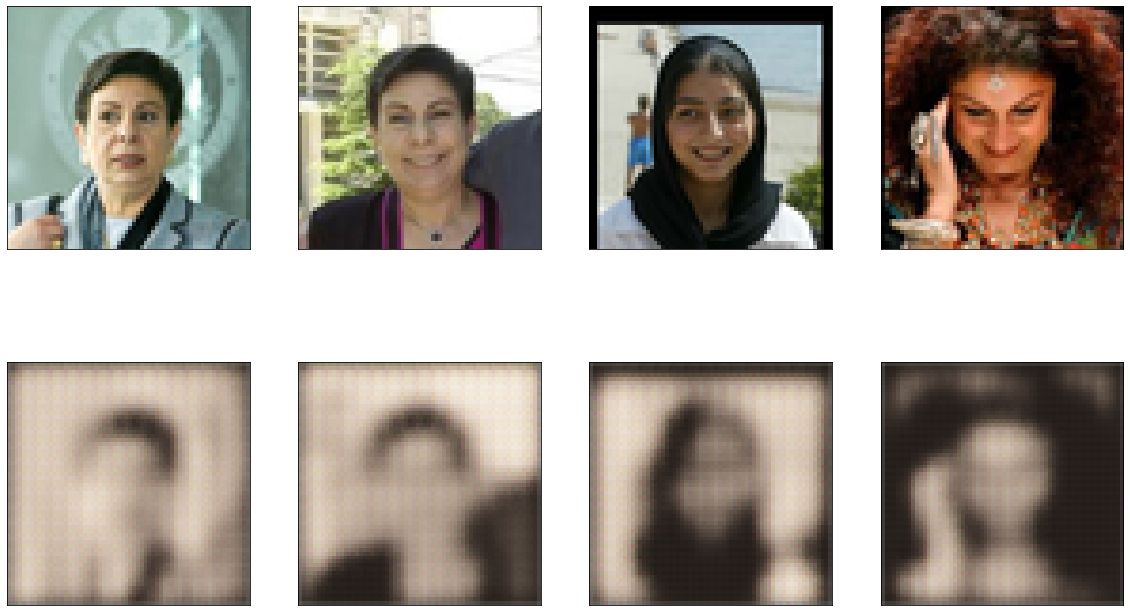

Running epoch 5/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:21 - loss: 0.9065 - acc: 0.645 - ETA: 1:18 - loss: 0.9511 - acc: 0.660 - ETA: 1:15 - loss: 0.9409 - acc: 0.645 - ETA: 1:12 - loss: 0.9533 - acc: 0.650 - ETA: 1:11 - loss: 0.9518 - acc: 0.655 - ETA: 1:08 - loss: 0.9529 - acc: 0.660 - ETA: 1:05 - loss: 0.9584 - acc: 0.658 - ETA: 1:03 - loss: 0.9593 - acc: 0.658 - ETA: 1:00 - loss: 0.9596 - acc: 0.656 - ETA: 59s - loss: 0.9607 - acc: 0.657 - ETA: 56s - loss: 0.9596 - acc: 0.65 - ETA: 54s - loss: 0.9614 - acc: 0.65 - ETA: 51s - loss: 0.9594 - acc: 0.65 - ETA: 49s - loss: 0.9601 - acc: 0.65 - ETA: 47s - loss: 0.9568 - acc: 0.65 - ETA: 45s - loss: 0.9604 - acc: 0.65 - ETA: 43s - loss: 0.9571 - acc: 0.65 - ETA: 41s - loss: 0.9580 - acc: 0.65 - ETA: 39s - loss: 0.9572 - acc: 0.65 - ETA: 37s - loss: 0.9588 - acc: 0.65 - ETA: 35s - loss: 0.9572 - acc: 0.65 - ETA: 33s - loss: 0.9580 - acc: 0.65 - ETA: 31s - loss: 0.9558 - acc: 0.65 - ETA: 29s - loss: 0.9572 - acc: 0.

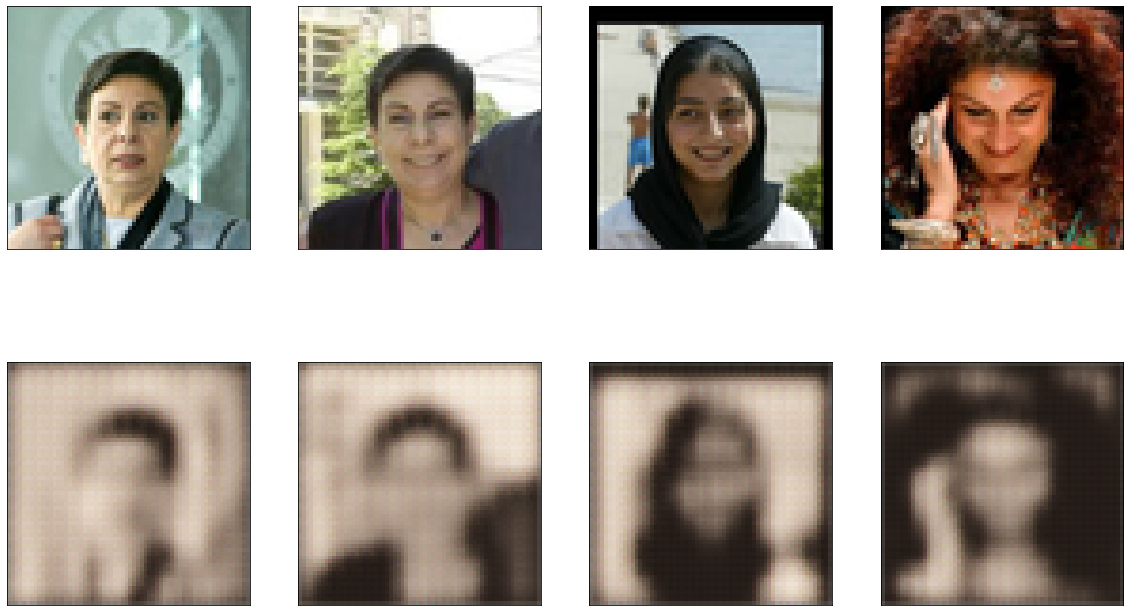

Running epoch 6/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:22 - loss: 0.9644 - acc: 0.672 - ETA: 1:17 - loss: 0.9632 - acc: 0.659 - ETA: 1:12 - loss: 0.9637 - acc: 0.664 - ETA: 1:09 - loss: 0.9747 - acc: 0.666 - ETA: 1:08 - loss: 0.9692 - acc: 0.659 - ETA: 1:05 - loss: 0.9737 - acc: 0.657 - ETA: 1:03 - loss: 0.9741 - acc: 0.657 - ETA: 1:01 - loss: 0.9775 - acc: 0.656 - ETA: 58s - loss: 0.9777 - acc: 0.658 - ETA: 56s - loss: 0.9777 - acc: 0.65 - ETA: 54s - loss: 0.9748 - acc: 0.65 - ETA: 52s - loss: 0.9769 - acc: 0.65 - ETA: 50s - loss: 0.9750 - acc: 0.65 - ETA: 48s - loss: 0.9769 - acc: 0.65 - ETA: 46s - loss: 0.9762 - acc: 0.65 - ETA: 44s - loss: 0.9773 - acc: 0.65 - ETA: 42s - loss: 0.9779 - acc: 0.65 - ETA: 40s - loss: 0.9788 - acc: 0.65 - ETA: 38s - loss: 0.9772 - acc: 0.65 - ETA: 36s - loss: 0.9785 - acc: 0.65 - ETA: 34s - loss: 0.9773 - acc: 0.65 - ETA: 32s - loss: 0.9776 - acc: 0.65 - ETA: 30s - loss: 0.9764 - acc: 0.65 - ETA: 28s - loss: 0.9762 - acc: 0.65

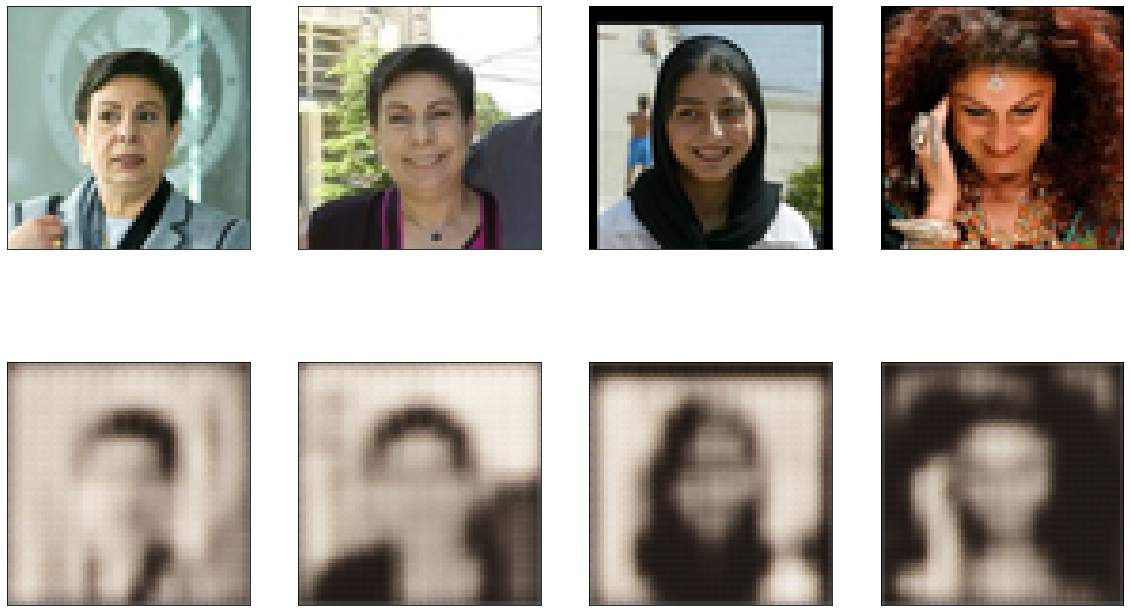

Running epoch 7/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:24 - loss: 0.9377 - acc: 0.666 - ETA: 1:18 - loss: 0.9665 - acc: 0.670 - ETA: 1:15 - loss: 0.9648 - acc: 0.666 - ETA: 1:14 - loss: 0.9712 - acc: 0.663 - ETA: 1:10 - loss: 0.9708 - acc: 0.667 - ETA: 1:06 - loss: 0.9756 - acc: 0.673 - ETA: 1:04 - loss: 0.9758 - acc: 0.663 - ETA: 1:02 - loss: 0.9785 - acc: 0.665 - ETA: 59s - loss: 0.9780 - acc: 0.666 - ETA: 57s - loss: 0.9813 - acc: 0.66 - ETA: 55s - loss: 0.9814 - acc: 0.66 - ETA: 53s - loss: 0.9823 - acc: 0.66 - ETA: 50s - loss: 0.9832 - acc: 0.66 - ETA: 48s - loss: 0.9838 - acc: 0.66 - ETA: 46s - loss: 0.9836 - acc: 0.66 - ETA: 45s - loss: 0.9848 - acc: 0.65 - ETA: 43s - loss: 0.9855 - acc: 0.65 - ETA: 41s - loss: 0.9864 - acc: 0.65 - ETA: 39s - loss: 0.9859 - acc: 0.65 - ETA: 37s - loss: 0.9851 - acc: 0.65 - ETA: 35s - loss: 0.9846 - acc: 0.65 - ETA: 33s - loss: 0.9860 - acc: 0.65 - ETA: 31s - loss: 0.9841 - acc: 0.65 - ETA: 29s - loss: 0.9849 - acc: 0.65

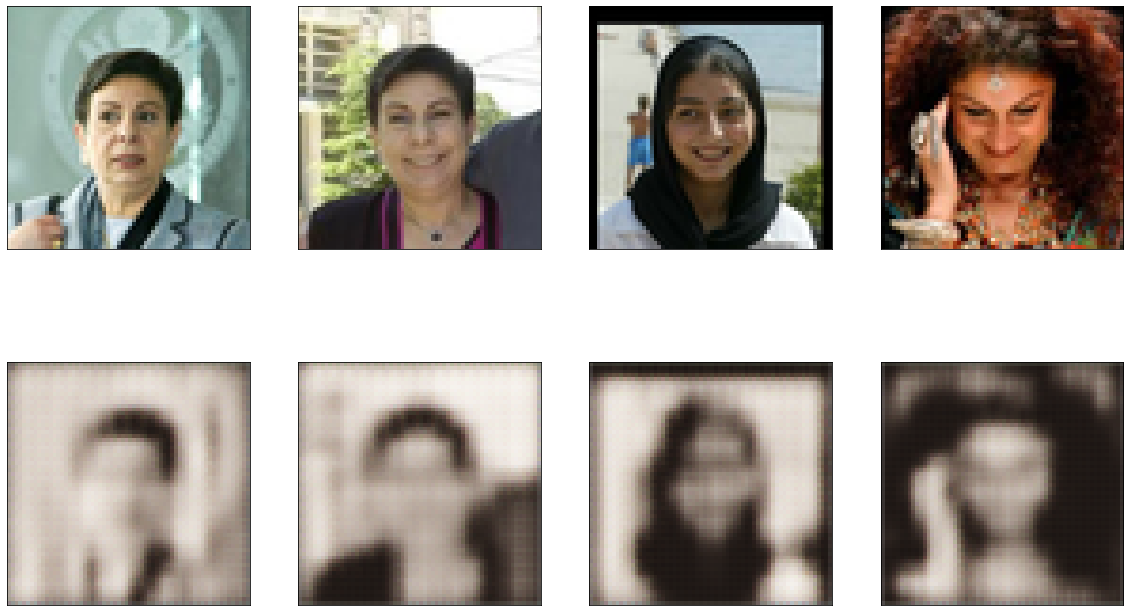

Running epoch 8/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:25 - loss: 0.9836 - acc: 0.680 - ETA: 1:17 - loss: 0.9986 - acc: 0.659 - ETA: 1:13 - loss: 0.9850 - acc: 0.665 - ETA: 1:11 - loss: 0.9890 - acc: 0.658 - ETA: 1:09 - loss: 0.9870 - acc: 0.663 - ETA: 1:05 - loss: 0.9885 - acc: 0.665 - ETA: 1:03 - loss: 0.9857 - acc: 0.668 - ETA: 1:01 - loss: 0.9878 - acc: 0.662 - ETA: 59s - loss: 0.9868 - acc: 0.664 - ETA: 57s - loss: 0.9862 - acc: 0.65 - ETA: 54s - loss: 0.9876 - acc: 0.66 - ETA: 52s - loss: 0.9899 - acc: 0.65 - ETA: 50s - loss: 0.9899 - acc: 0.65 - ETA: 48s - loss: 0.9916 - acc: 0.65 - ETA: 46s - loss: 0.9912 - acc: 0.65 - ETA: 44s - loss: 0.9911 - acc: 0.65 - ETA: 42s - loss: 0.9918 - acc: 0.65 - ETA: 40s - loss: 0.9924 - acc: 0.65 - ETA: 38s - loss: 0.9910 - acc: 0.65 - ETA: 36s - loss: 0.9908 - acc: 0.65 - ETA: 34s - loss: 0.9897 - acc: 0.65 - ETA: 32s - loss: 0.9904 - acc: 0.65 - ETA: 31s - loss: 0.9899 - acc: 0.65 - ETA: 29s - loss: 0.9904 - acc: 0.65

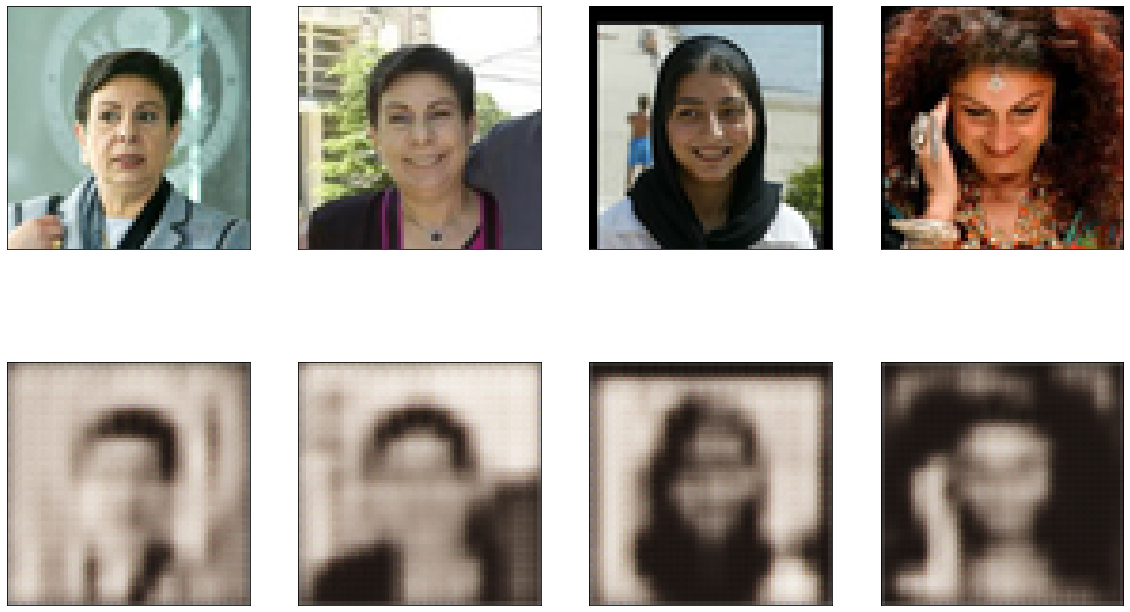

Running epoch 9/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:23 - loss: 0.9835 - acc: 0.683 - ETA: 1:18 - loss: 1.0022 - acc: 0.673 - ETA: 1:13 - loss: 1.0001 - acc: 0.667 - ETA: 1:10 - loss: 1.0035 - acc: 0.670 - ETA: 1:07 - loss: 0.9954 - acc: 0.665 - ETA: 1:04 - loss: 0.9986 - acc: 0.660 - ETA: 1:02 - loss: 0.9958 - acc: 0.660 - ETA: 1:00 - loss: 0.9982 - acc: 0.663 - ETA: 58s - loss: 0.9969 - acc: 0.665 - ETA: 56s - loss: 0.9977 - acc: 0.66 - ETA: 54s - loss: 0.9948 - acc: 0.66 - ETA: 52s - loss: 0.9963 - acc: 0.66 - ETA: 50s - loss: 0.9937 - acc: 0.66 - ETA: 49s - loss: 0.9947 - acc: 0.65 - ETA: 47s - loss: 0.9939 - acc: 0.66 - ETA: 45s - loss: 0.9946 - acc: 0.66 - ETA: 43s - loss: 0.9945 - acc: 0.65 - ETA: 41s - loss: 0.9954 - acc: 0.65 - ETA: 39s - loss: 0.9956 - acc: 0.65 - ETA: 37s - loss: 0.9952 - acc: 0.65 - ETA: 35s - loss: 0.9942 - acc: 0.65 - ETA: 33s - loss: 0.9941 - acc: 0.65 - ETA: 31s - loss: 0.9946 - acc: 0.65 - ETA: 29s - loss: 0.9945 - acc: 0.65

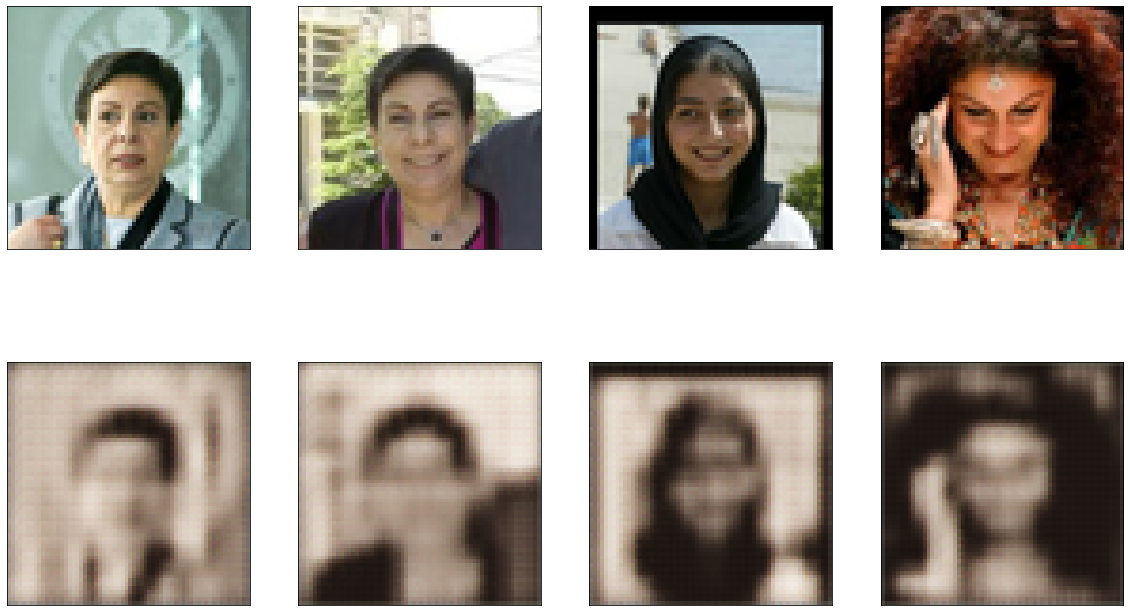

Running epoch 10/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:26 - loss: 0.9947 - acc: 0.665 - ETA: 1:18 - loss: 1.0010 - acc: 0.662 - ETA: 1:13 - loss: 1.0009 - acc: 0.653 - ETA: 1:10 - loss: 1.0042 - acc: 0.659 - ETA: 1:09 - loss: 1.0030 - acc: 0.661 - ETA: 1:06 - loss: 1.0000 - acc: 0.664 - ETA: 1:04 - loss: 0.9967 - acc: 0.661 - ETA: 1:02 - loss: 0.9953 - acc: 0.661 - ETA: 59s - loss: 0.9945 - acc: 0.657 - ETA: 57s - loss: 0.9970 - acc: 0.65 - ETA: 55s - loss: 0.9970 - acc: 0.65 - ETA: 53s - loss: 0.9987 - acc: 0.65 - ETA: 51s - loss: 0.9981 - acc: 0.65 - ETA: 49s - loss: 0.9987 - acc: 0.65 - ETA: 47s - loss: 0.9981 - acc: 0.65 - ETA: 46s - loss: 0.9987 - acc: 0.65 - ETA: 44s - loss: 0.9976 - acc: 0.65 - ETA: 42s - loss: 0.9983 - acc: 0.65 - ETA: 40s - loss: 0.9984 - acc: 0.65 - ETA: 38s - loss: 0.9973 - acc: 0.65 - ETA: 36s - loss: 0.9966 - acc: 0.65 - ETA: 34s - loss: 0.9973 - acc: 0.65 - ETA: 32s - loss: 0.9969 - acc: 0.65 - ETA: 29s - loss: 0.9975 - acc: 0.6

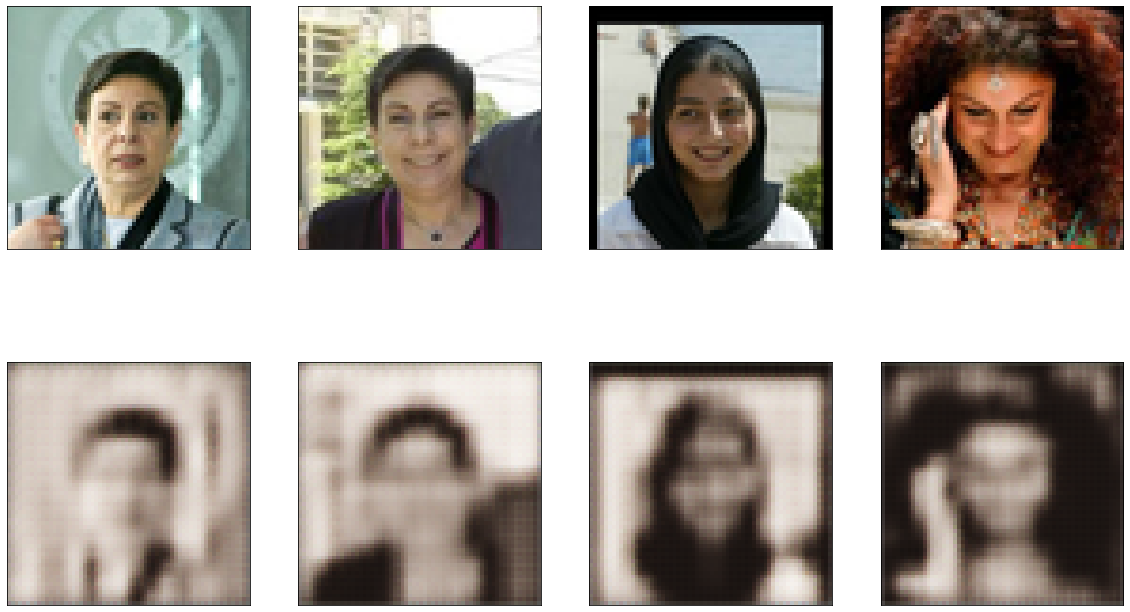

Running epoch 11/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:46 - loss: 0.9836 - acc: 0.643 - ETA: 1:39 - loss: 1.0019 - acc: 0.649 - ETA: 1:36 - loss: 0.9912 - acc: 0.644 - ETA: 1:32 - loss: 0.9969 - acc: 0.643 - ETA: 1:29 - loss: 0.9942 - acc: 0.646 - ETA: 1:26 - loss: 0.9954 - acc: 0.646 - ETA: 1:23 - loss: 0.9973 - acc: 0.642 - ETA: 1:20 - loss: 0.9995 - acc: 0.642 - ETA: 1:17 - loss: 0.9987 - acc: 0.645 - ETA: 1:15 - loss: 0.9993 - acc: 0.646 - ETA: 1:12 - loss: 0.9975 - acc: 0.647 - ETA: 1:10 - loss: 0.9983 - acc: 0.647 - ETA: 1:07 - loss: 0.9989 - acc: 0.647 - ETA: 1:04 - loss: 0.9984 - acc: 0.648 - ETA: 1:02 - loss: 0.9973 - acc: 0.650 - ETA: 59s - loss: 0.9978 - acc: 0.652 - ETA: 56s - loss: 0.9978 - acc: 0.65 - ETA: 54s - loss: 0.9977 - acc: 0.65 - ETA: 51s - loss: 0.9972 - acc: 0.65 - ETA: 49s - loss: 0.9970 - acc: 0.65 - ETA: 46s - loss: 0.9969 - acc: 0.65 - ETA: 43s - loss: 0.9970 - acc: 0.65 - ETA: 41s - loss: 0.9973 - acc: 0.65 - ETA: 38s - loss: 0.9

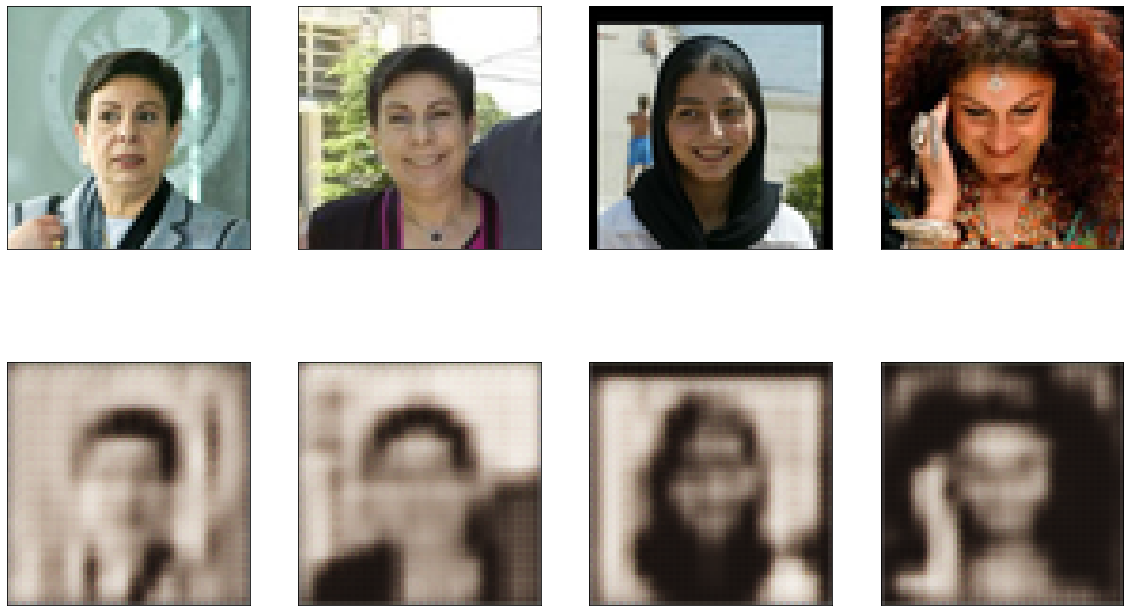

Running epoch 12/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:47 - loss: 0.9937 - acc: 0.636 - ETA: 1:40 - loss: 0.9994 - acc: 0.656 - ETA: 1:35 - loss: 0.9974 - acc: 0.657 - ETA: 1:32 - loss: 0.9997 - acc: 0.655 - ETA: 1:29 - loss: 1.0011 - acc: 0.656 - ETA: 1:26 - loss: 1.0027 - acc: 0.655 - ETA: 1:23 - loss: 1.0005 - acc: 0.654 - ETA: 1:20 - loss: 1.0005 - acc: 0.655 - ETA: 1:18 - loss: 0.9999 - acc: 0.655 - ETA: 1:15 - loss: 1.0016 - acc: 0.652 - ETA: 1:12 - loss: 1.0014 - acc: 0.652 - ETA: 1:09 - loss: 1.0017 - acc: 0.656 - ETA: 1:07 - loss: 1.0002 - acc: 0.656 - ETA: 1:05 - loss: 1.0009 - acc: 0.658 - ETA: 1:02 - loss: 1.0014 - acc: 0.657 - ETA: 59s - loss: 1.0019 - acc: 0.658 - ETA: 57s - loss: 1.0015 - acc: 0.65 - ETA: 54s - loss: 1.0008 - acc: 0.66 - ETA: 52s - loss: 0.9999 - acc: 0.66 - ETA: 49s - loss: 1.0006 - acc: 0.65 - ETA: 47s - loss: 0.9999 - acc: 0.65 - ETA: 44s - loss: 1.0003 - acc: 0.65 - ETA: 41s - loss: 0.9982 - acc: 0.65 - ETA: 39s - loss: 0.9

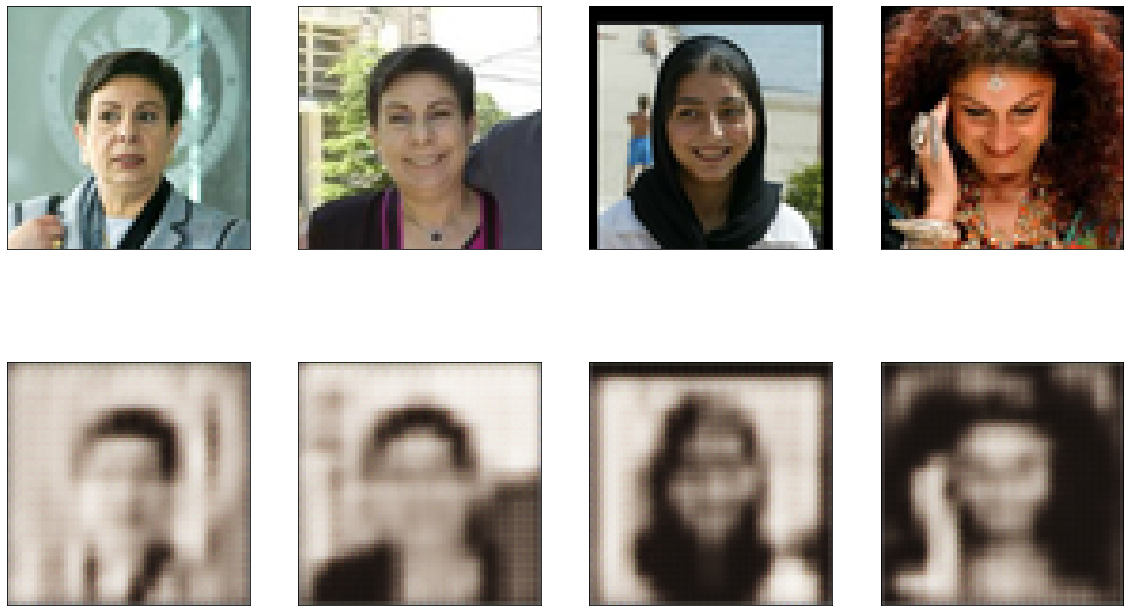

Running epoch 13/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:59 - loss: 0.9607 - acc: 0.654 - ETA: 1:52 - loss: 0.9834 - acc: 0.655 - ETA: 1:44 - loss: 0.9821 - acc: 0.661 - ETA: 1:38 - loss: 0.9861 - acc: 0.659 - ETA: 1:34 - loss: 0.9870 - acc: 0.652 - ETA: 1:30 - loss: 0.9892 - acc: 0.657 - ETA: 1:27 - loss: 0.9895 - acc: 0.660 - ETA: 1:23 - loss: 0.9915 - acc: 0.662 - ETA: 1:20 - loss: 0.9931 - acc: 0.663 - ETA: 1:17 - loss: 0.9953 - acc: 0.662 - ETA: 1:14 - loss: 0.9958 - acc: 0.664 - ETA: 1:11 - loss: 0.9958 - acc: 0.661 - ETA: 1:08 - loss: 0.9957 - acc: 0.661 - ETA: 1:06 - loss: 0.9971 - acc: 0.661 - ETA: 1:03 - loss: 0.9975 - acc: 0.659 - ETA: 1:00 - loss: 0.9977 - acc: 0.661 - ETA: 57s - loss: 0.9973 - acc: 0.660 - ETA: 55s - loss: 0.9972 - acc: 0.65 - ETA: 52s - loss: 0.9966 - acc: 0.66 - ETA: 50s - loss: 0.9975 - acc: 0.66 - ETA: 47s - loss: 0.9971 - acc: 0.66 - ETA: 44s - loss: 0.9976 - acc: 0.65 - ETA: 41s - loss: 0.9974 - acc: 0.65 - ETA: 39s - loss: 0

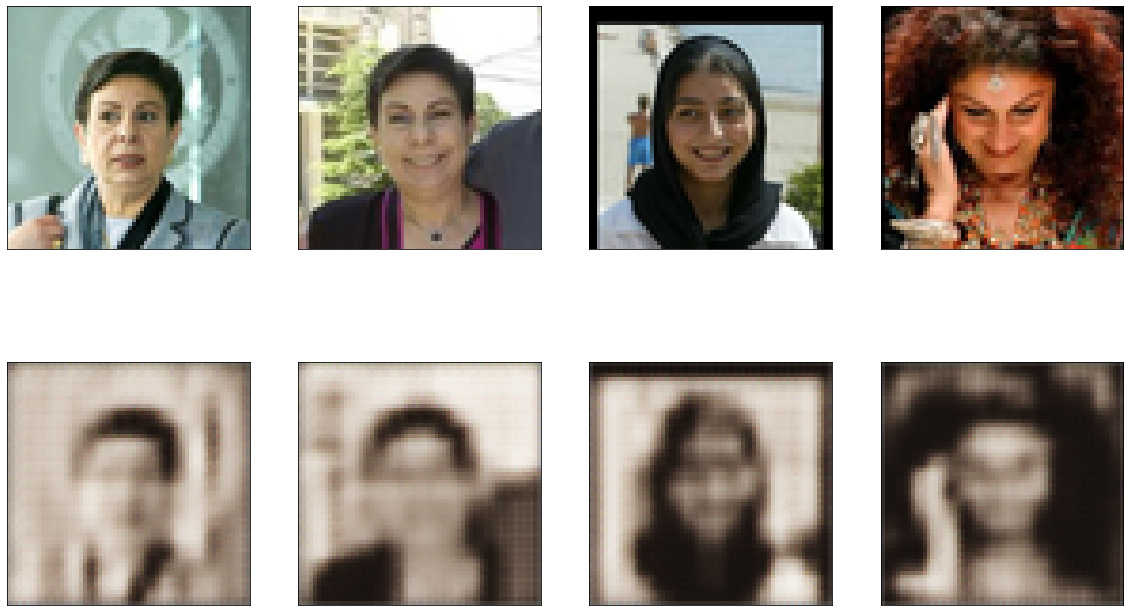

Running epoch 14/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:50 - loss: 1.0048 - acc: 0.670 - ETA: 1:42 - loss: 1.0050 - acc: 0.661 - ETA: 1:38 - loss: 1.0020 - acc: 0.659 - ETA: 1:34 - loss: 1.0032 - acc: 0.659 - ETA: 1:30 - loss: 0.9984 - acc: 0.665 - ETA: 1:27 - loss: 1.0019 - acc: 0.666 - ETA: 1:24 - loss: 0.9963 - acc: 0.668 - ETA: 1:22 - loss: 0.9989 - acc: 0.669 - ETA: 1:19 - loss: 0.9973 - acc: 0.666 - ETA: 1:17 - loss: 0.9984 - acc: 0.666 - ETA: 1:14 - loss: 0.9975 - acc: 0.665 - ETA: 1:11 - loss: 0.9977 - acc: 0.664 - ETA: 1:09 - loss: 0.9977 - acc: 0.663 - ETA: 1:06 - loss: 0.9986 - acc: 0.661 - ETA: 1:04 - loss: 0.9977 - acc: 0.659 - ETA: 1:01 - loss: 0.9980 - acc: 0.660 - ETA: 58s - loss: 0.9964 - acc: 0.660 - ETA: 56s - loss: 0.9972 - acc: 0.66 - ETA: 53s - loss: 0.9972 - acc: 0.65 - ETA: 50s - loss: 0.9977 - acc: 0.65 - ETA: 47s - loss: 0.9970 - acc: 0.65 - ETA: 45s - loss: 0.9980 - acc: 0.65 - ETA: 42s - loss: 0.9978 - acc: 0.65 - ETA: 39s - loss: 0

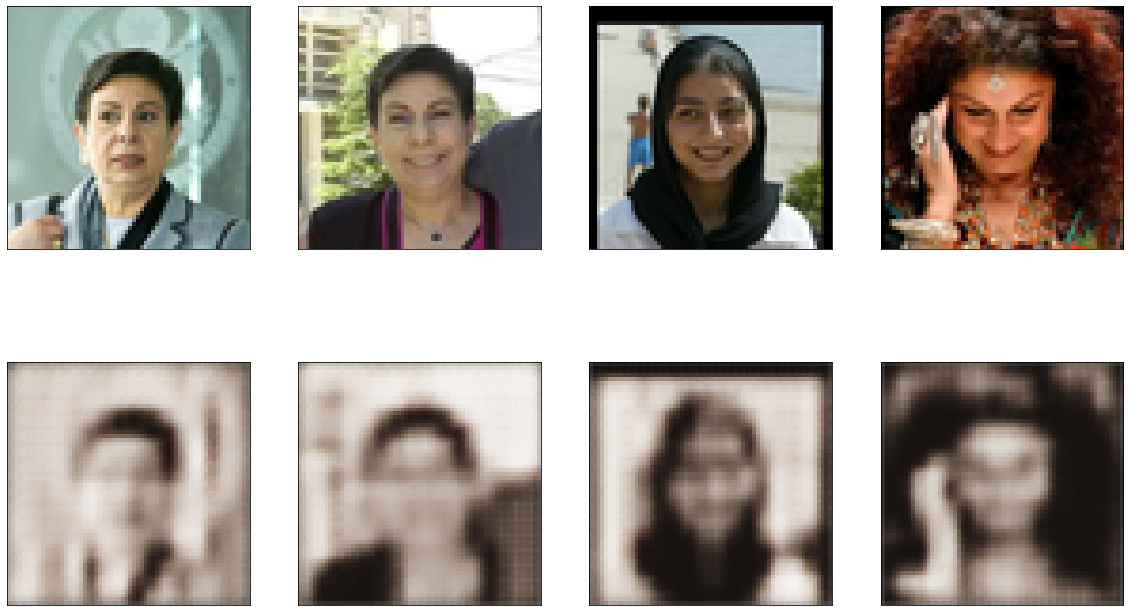

Running epoch 15/50
Epoch 1/1
5000/5000 [==============================] - ETA: 2:07 - loss: 0.9734 - acc: 0.671 - ETA: 1:52 - loss: 0.9975 - acc: 0.669 - ETA: 1:43 - loss: 0.9977 - acc: 0.669 - ETA: 1:39 - loss: 1.0029 - acc: 0.671 - ETA: 1:34 - loss: 1.0002 - acc: 0.672 - ETA: 1:31 - loss: 1.0016 - acc: 0.667 - ETA: 1:28 - loss: 1.0027 - acc: 0.663 - ETA: 1:24 - loss: 1.0029 - acc: 0.666 - ETA: 1:21 - loss: 1.0011 - acc: 0.667 - ETA: 1:18 - loss: 1.0012 - acc: 0.664 - ETA: 1:15 - loss: 1.0013 - acc: 0.662 - ETA: 1:13 - loss: 1.0001 - acc: 0.660 - ETA: 1:10 - loss: 0.9996 - acc: 0.660 - ETA: 1:07 - loss: 1.0000 - acc: 0.658 - ETA: 1:04 - loss: 0.9993 - acc: 0.657 - ETA: 1:01 - loss: 1.0004 - acc: 0.657 - ETA: 58s - loss: 1.0000 - acc: 0.657 - ETA: 56s - loss: 1.0004 - acc: 0.65 - ETA: 53s - loss: 1.0006 - acc: 0.65 - ETA: 50s - loss: 1.0015 - acc: 0.65 - ETA: 47s - loss: 1.0015 - acc: 0.65 - ETA: 45s - loss: 1.0019 - acc: 0.65 - ETA: 42s - loss: 1.0022 - acc: 0.65 - ETA: 39s - loss: 1

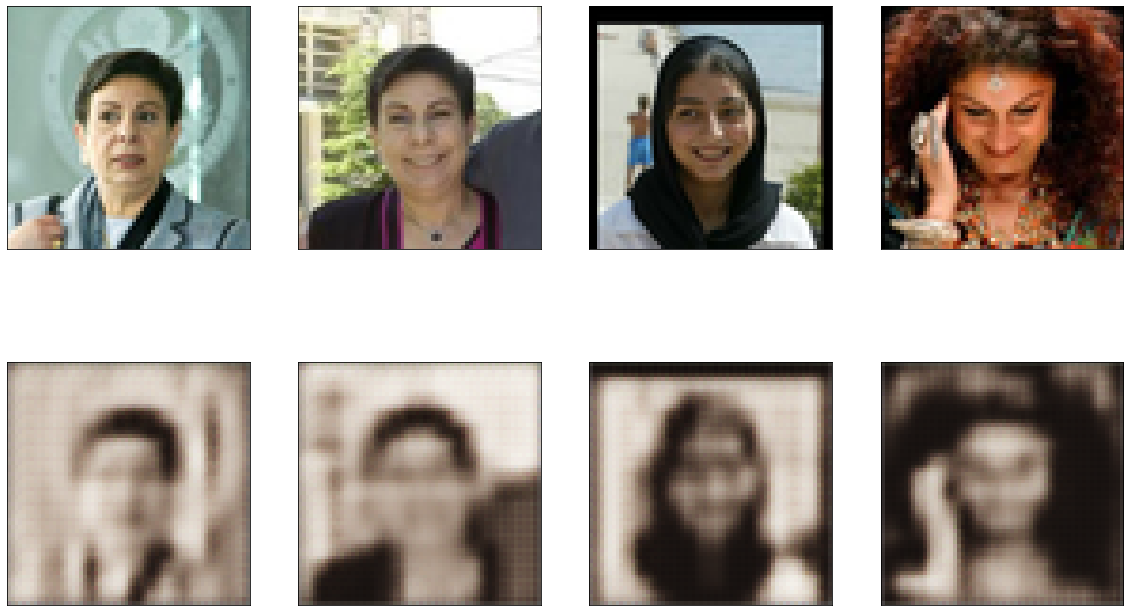

Running epoch 16/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:45 - loss: 0.9982 - acc: 0.647 - ETA: 1:39 - loss: 1.0004 - acc: 0.643 - ETA: 1:34 - loss: 0.9981 - acc: 0.647 - ETA: 1:31 - loss: 1.0010 - acc: 0.643 - ETA: 1:29 - loss: 0.9978 - acc: 0.643 - ETA: 1:26 - loss: 1.0010 - acc: 0.642 - ETA: 1:23 - loss: 0.9993 - acc: 0.646 - ETA: 1:20 - loss: 1.0007 - acc: 0.647 - ETA: 1:17 - loss: 0.9973 - acc: 0.646 - ETA: 1:15 - loss: 0.9985 - acc: 0.647 - ETA: 1:12 - loss: 0.9973 - acc: 0.648 - ETA: 1:10 - loss: 0.9990 - acc: 0.649 - ETA: 1:07 - loss: 0.9974 - acc: 0.652 - ETA: 1:04 - loss: 0.9986 - acc: 0.655 - ETA: 1:02 - loss: 0.9988 - acc: 0.655 - ETA: 1:00 - loss: 0.9992 - acc: 0.655 - ETA: 57s - loss: 0.9998 - acc: 0.655 - ETA: 54s - loss: 1.0007 - acc: 0.65 - ETA: 52s - loss: 0.9993 - acc: 0.65 - ETA: 49s - loss: 0.9997 - acc: 0.65 - ETA: 46s - loss: 0.9995 - acc: 0.65 - ETA: 44s - loss: 1.0000 - acc: 0.65 - ETA: 41s - loss: 1.0007 - acc: 0.65 - ETA: 39s - loss: 1

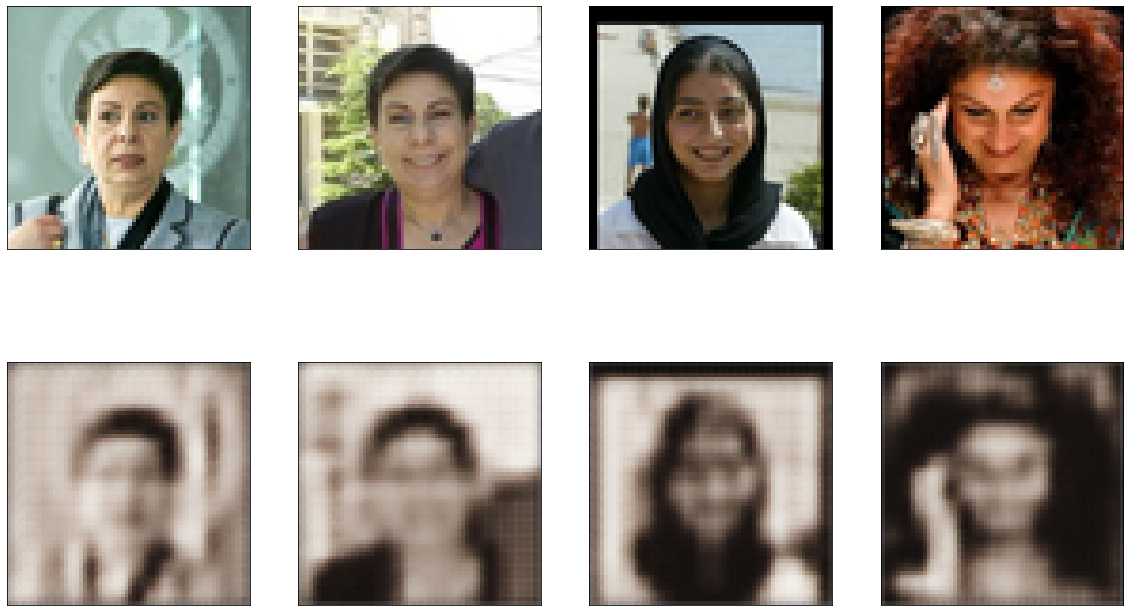

Running epoch 17/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:52 - loss: 0.9993 - acc: 0.635 - ETA: 1:42 - loss: 1.0020 - acc: 0.655 - ETA: 1:38 - loss: 1.0051 - acc: 0.664 - ETA: 1:33 - loss: 1.0064 - acc: 0.665 - ETA: 1:30 - loss: 1.0039 - acc: 0.665 - ETA: 1:27 - loss: 1.0042 - acc: 0.661 - ETA: 1:24 - loss: 1.0020 - acc: 0.657 - ETA: 1:21 - loss: 1.0000 - acc: 0.654 - ETA: 1:19 - loss: 0.9987 - acc: 0.653 - ETA: 1:16 - loss: 0.9995 - acc: 0.656 - ETA: 1:13 - loss: 1.0003 - acc: 0.655 - ETA: 1:10 - loss: 1.0008 - acc: 0.655 - ETA: 1:08 - loss: 1.0005 - acc: 0.651 - ETA: 1:05 - loss: 1.0018 - acc: 0.651 - ETA: 1:02 - loss: 1.0017 - acc: 0.651 - ETA: 1:00 - loss: 1.0015 - acc: 0.651 - ETA: 57s - loss: 1.0012 - acc: 0.652 - ETA: 55s - loss: 1.0017 - acc: 0.65 - ETA: 52s - loss: 1.0017 - acc: 0.65 - ETA: 49s - loss: 1.0018 - acc: 0.65 - ETA: 47s - loss: 1.0002 - acc: 0.65 - ETA: 44s - loss: 1.0008 - acc: 0.65 - ETA: 41s - loss: 1.0007 - acc: 0.65 - ETA: 39s - loss: 1

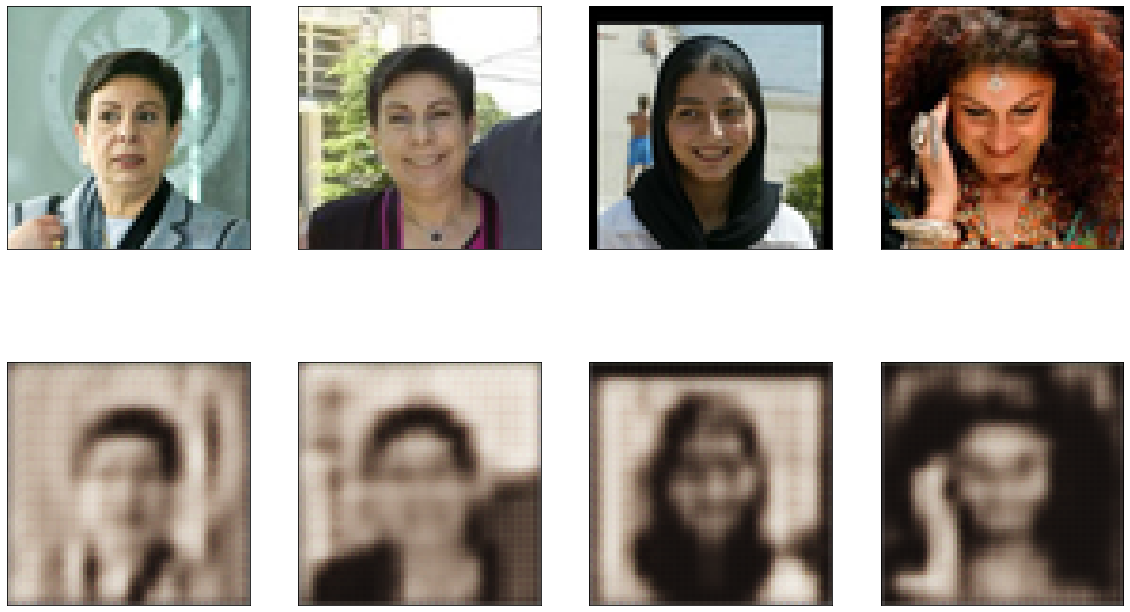

Running epoch 18/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:55 - loss: 1.0161 - acc: 0.606 - ETA: 1:44 - loss: 1.0123 - acc: 0.620 - ETA: 1:40 - loss: 1.0108 - acc: 0.631 - ETA: 1:36 - loss: 1.0079 - acc: 0.639 - ETA: 1:33 - loss: 1.0074 - acc: 0.645 - ETA: 1:29 - loss: 1.0085 - acc: 0.646 - ETA: 1:26 - loss: 1.0077 - acc: 0.648 - ETA: 1:23 - loss: 1.0086 - acc: 0.650 - ETA: 1:20 - loss: 1.0077 - acc: 0.650 - ETA: 1:18 - loss: 1.0077 - acc: 0.655 - ETA: 1:14 - loss: 1.0060 - acc: 0.656 - ETA: 1:12 - loss: 1.0045 - acc: 0.654 - ETA: 1:09 - loss: 1.0035 - acc: 0.656 - ETA: 1:06 - loss: 1.0039 - acc: 0.656 - ETA: 1:03 - loss: 1.0029 - acc: 0.656 - ETA: 1:01 - loss: 1.0034 - acc: 0.657 - ETA: 58s - loss: 1.0032 - acc: 0.657 - ETA: 56s - loss: 1.0035 - acc: 0.65 - ETA: 53s - loss: 1.0026 - acc: 0.65 - ETA: 50s - loss: 1.0033 - acc: 0.65 - ETA: 48s - loss: 1.0031 - acc: 0.65 - ETA: 45s - loss: 1.0031 - acc: 0.65 - ETA: 42s - loss: 1.0026 - acc: 0.65 - ETA: 39s - loss: 1

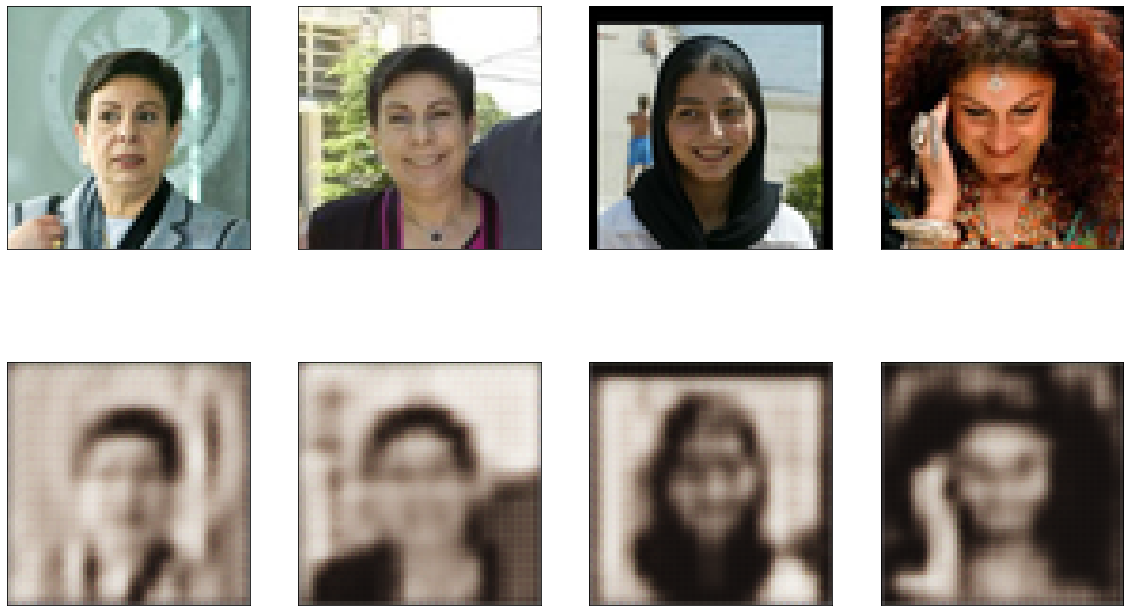

Running epoch 19/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:54 - loss: 1.0035 - acc: 0.671 - ETA: 1:48 - loss: 1.0020 - acc: 0.654 - ETA: 1:41 - loss: 1.0051 - acc: 0.658 - ETA: 1:37 - loss: 1.0055 - acc: 0.654 - ETA: 1:33 - loss: 1.0049 - acc: 0.663 - ETA: 1:29 - loss: 1.0061 - acc: 0.663 - ETA: 1:25 - loss: 1.0049 - acc: 0.663 - ETA: 1:23 - loss: 1.0063 - acc: 0.662 - ETA: 1:20 - loss: 1.0018 - acc: 0.663 - ETA: 1:17 - loss: 1.0032 - acc: 0.663 - ETA: 1:15 - loss: 1.0003 - acc: 0.661 - ETA: 1:12 - loss: 1.0019 - acc: 0.659 - ETA: 1:09 - loss: 1.0024 - acc: 0.658 - ETA: 1:06 - loss: 1.0023 - acc: 0.659 - ETA: 1:03 - loss: 1.0031 - acc: 0.659 - ETA: 1:01 - loss: 1.0039 - acc: 0.659 - ETA: 58s - loss: 1.0042 - acc: 0.658 - ETA: 55s - loss: 1.0044 - acc: 0.65 - ETA: 53s - loss: 1.0041 - acc: 0.65 - ETA: 50s - loss: 1.0048 - acc: 0.65 - ETA: 47s - loss: 1.0040 - acc: 0.65 - ETA: 45s - loss: 1.0042 - acc: 0.65 - ETA: 42s - loss: 1.0036 - acc: 0.65 - ETA: 39s - loss: 1

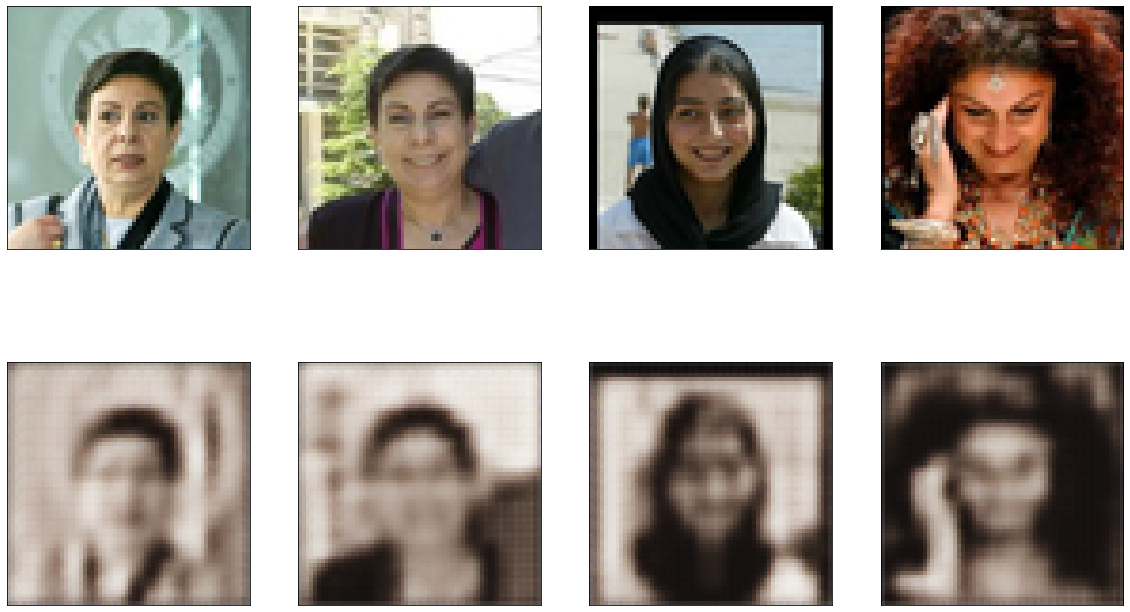

Running epoch 20/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:51 - loss: 0.9971 - acc: 0.673 - ETA: 1:44 - loss: 0.9997 - acc: 0.669 - ETA: 1:39 - loss: 1.0042 - acc: 0.662 - ETA: 1:35 - loss: 1.0055 - acc: 0.668 - ETA: 1:32 - loss: 1.0046 - acc: 0.665 - ETA: 1:29 - loss: 1.0036 - acc: 0.666 - ETA: 1:25 - loss: 1.0032 - acc: 0.659 - ETA: 1:24 - loss: 1.0038 - acc: 0.660 - ETA: 1:22 - loss: 1.0042 - acc: 0.662 - ETA: 1:19 - loss: 1.0044 - acc: 0.661 - ETA: 1:17 - loss: 1.0045 - acc: 0.662 - ETA: 1:15 - loss: 1.0049 - acc: 0.661 - ETA: 1:12 - loss: 1.0032 - acc: 0.661 - ETA: 1:10 - loss: 1.0042 - acc: 0.658 - ETA: 1:07 - loss: 1.0037 - acc: 0.660 - ETA: 1:04 - loss: 1.0046 - acc: 0.660 - ETA: 1:01 - loss: 1.0048 - acc: 0.659 - ETA: 58s - loss: 1.0055 - acc: 0.658 - ETA: 55s - loss: 1.0047 - acc: 0.65 - ETA: 52s - loss: 1.0047 - acc: 0.65 - ETA: 49s - loss: 1.0044 - acc: 0.65 - ETA: 47s - loss: 1.0046 - acc: 0.65 - ETA: 44s - loss: 1.0042 - acc: 0.65 - ETA: 41s - loss:

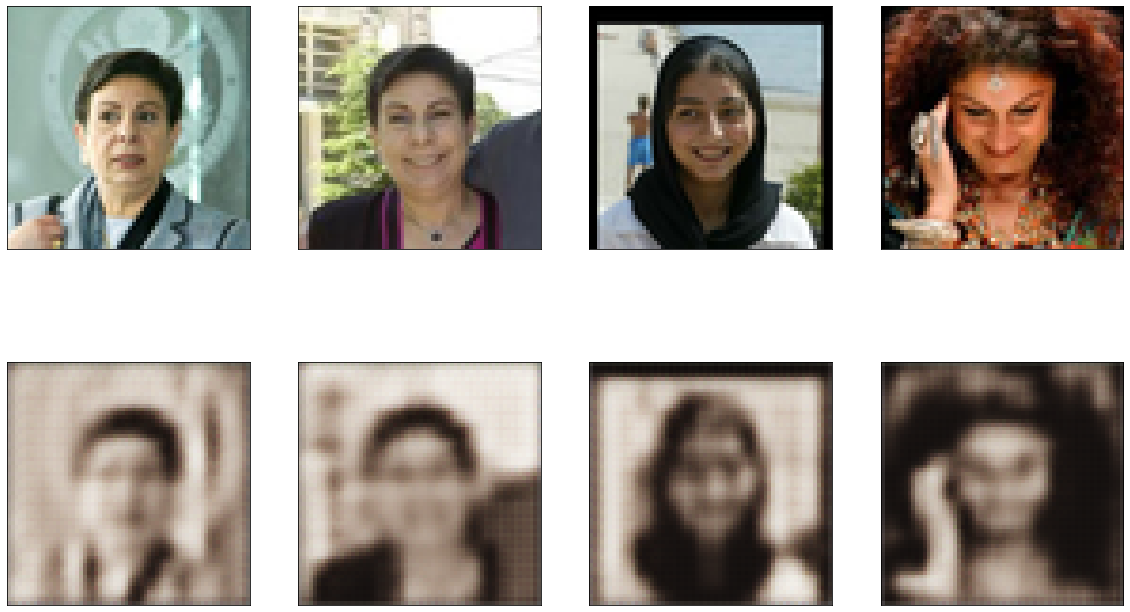

Running epoch 21/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:58 - loss: 1.0037 - acc: 0.671 - ETA: 1:48 - loss: 1.0090 - acc: 0.666 - ETA: 1:41 - loss: 1.0051 - acc: 0.668 - ETA: 1:37 - loss: 1.0079 - acc: 0.663 - ETA: 1:32 - loss: 1.0047 - acc: 0.664 - ETA: 1:29 - loss: 1.0055 - acc: 0.664 - ETA: 1:26 - loss: 1.0040 - acc: 0.664 - ETA: 1:23 - loss: 1.0052 - acc: 0.663 - ETA: 1:20 - loss: 1.0052 - acc: 0.660 - ETA: 1:17 - loss: 1.0062 - acc: 0.660 - ETA: 1:14 - loss: 1.0053 - acc: 0.661 - ETA: 1:12 - loss: 1.0065 - acc: 0.656 - ETA: 1:09 - loss: 1.0057 - acc: 0.657 - ETA: 1:06 - loss: 1.0057 - acc: 0.656 - ETA: 1:03 - loss: 1.0040 - acc: 0.655 - ETA: 1:00 - loss: 1.0049 - acc: 0.654 - ETA: 58s - loss: 1.0048 - acc: 0.654 - ETA: 55s - loss: 1.0051 - acc: 0.65 - ETA: 52s - loss: 1.0048 - acc: 0.65 - ETA: 50s - loss: 1.0054 - acc: 0.65 - ETA: 47s - loss: 1.0049 - acc: 0.65 - ETA: 44s - loss: 1.0055 - acc: 0.65 - ETA: 42s - loss: 1.0047 - acc: 0.65 - ETA: 39s - loss: 1

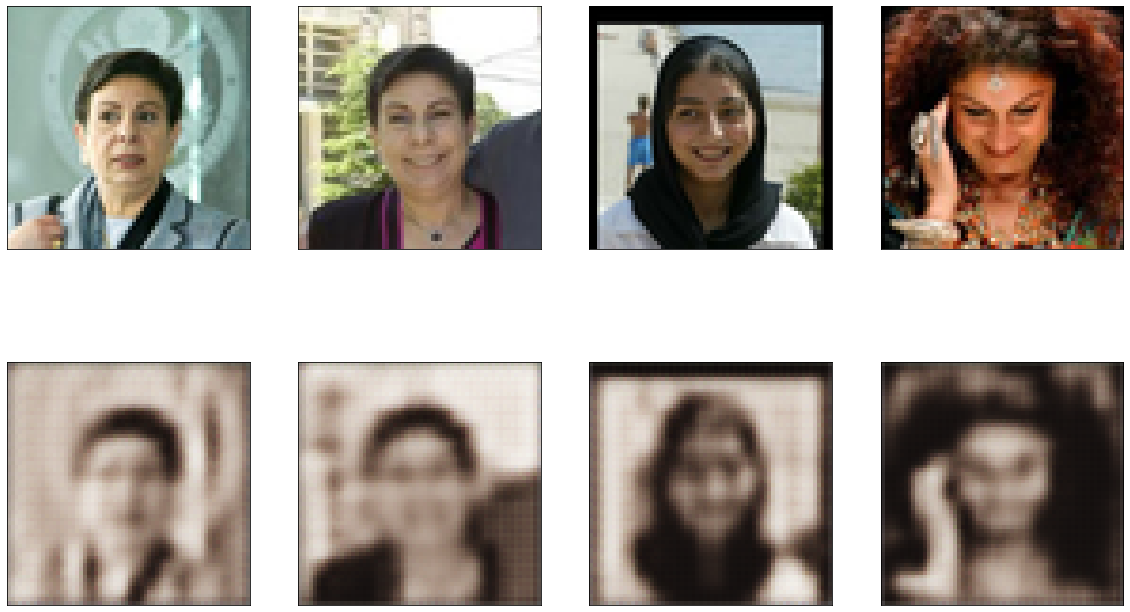

Running epoch 22/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:50 - loss: 0.9879 - acc: 0.686 - ETA: 1:44 - loss: 0.9957 - acc: 0.670 - ETA: 1:38 - loss: 0.9997 - acc: 0.663 - ETA: 1:35 - loss: 1.0041 - acc: 0.654 - ETA: 1:32 - loss: 1.0057 - acc: 0.654 - ETA: 1:29 - loss: 1.0063 - acc: 0.658 - ETA: 1:25 - loss: 1.0051 - acc: 0.660 - ETA: 1:22 - loss: 1.0038 - acc: 0.660 - ETA: 1:19 - loss: 1.0044 - acc: 0.655 - ETA: 1:17 - loss: 1.0048 - acc: 0.656 - ETA: 1:14 - loss: 1.0041 - acc: 0.657 - ETA: 1:11 - loss: 1.0051 - acc: 0.657 - ETA: 1:08 - loss: 1.0052 - acc: 0.657 - ETA: 1:06 - loss: 1.0054 - acc: 0.654 - ETA: 1:03 - loss: 1.0054 - acc: 0.656 - ETA: 1:00 - loss: 1.0055 - acc: 0.655 - ETA: 58s - loss: 1.0052 - acc: 0.657 - ETA: 55s - loss: 1.0054 - acc: 0.65 - ETA: 53s - loss: 1.0044 - acc: 0.65 - ETA: 50s - loss: 1.0044 - acc: 0.65 - ETA: 47s - loss: 1.0042 - acc: 0.65 - ETA: 45s - loss: 1.0048 - acc: 0.65 - ETA: 42s - loss: 1.0051 - acc: 0.65 - ETA: 39s - loss: 1

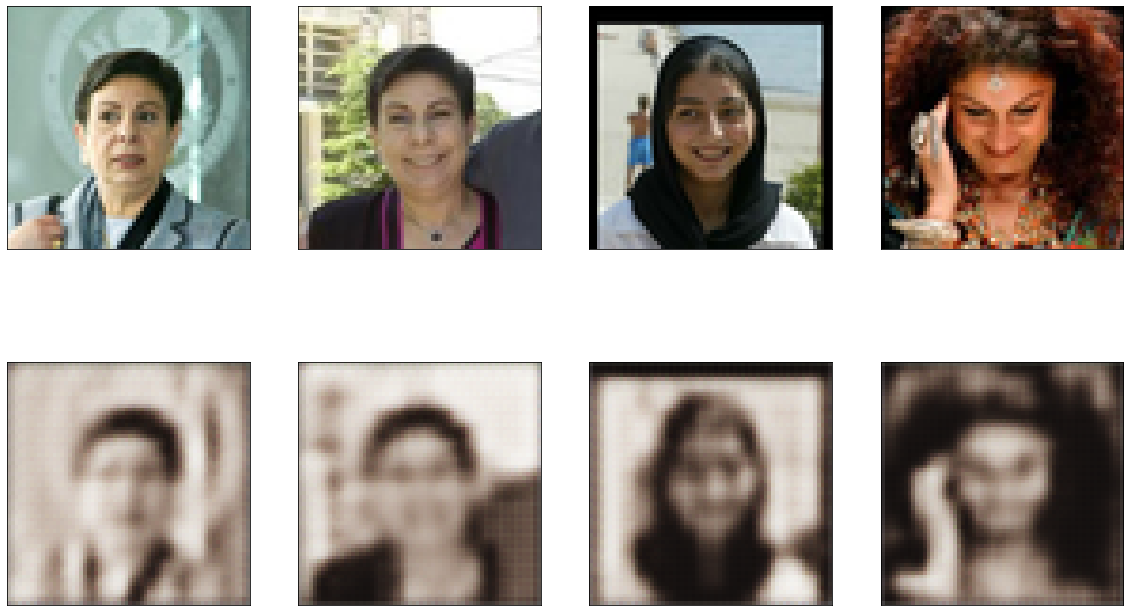

Running epoch 23/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:49 - loss: 1.0093 - acc: 0.648 - ETA: 1:41 - loss: 1.0108 - acc: 0.656 - ETA: 1:36 - loss: 0.9952 - acc: 0.655 - ETA: 1:33 - loss: 0.9984 - acc: 0.665 - ETA: 1:30 - loss: 0.9978 - acc: 0.670 - ETA: 1:27 - loss: 0.9967 - acc: 0.672 - ETA: 1:24 - loss: 0.9985 - acc: 0.668 - ETA: 1:22 - loss: 1.0006 - acc: 0.668 - ETA: 1:19 - loss: 1.0010 - acc: 0.663 - ETA: 1:16 - loss: 1.0026 - acc: 0.659 - ETA: 1:13 - loss: 1.0027 - acc: 0.659 - ETA: 1:11 - loss: 1.0031 - acc: 0.661 - ETA: 1:08 - loss: 1.0034 - acc: 0.661 - ETA: 1:05 - loss: 1.0042 - acc: 0.660 - ETA: 1:03 - loss: 1.0045 - acc: 0.657 - ETA: 1:00 - loss: 1.0033 - acc: 0.656 - ETA: 57s - loss: 1.0024 - acc: 0.656 - ETA: 55s - loss: 1.0031 - acc: 0.65 - ETA: 52s - loss: 1.0029 - acc: 0.65 - ETA: 50s - loss: 1.0035 - acc: 0.65 - ETA: 47s - loss: 1.0039 - acc: 0.65 - ETA: 44s - loss: 1.0041 - acc: 0.65 - ETA: 42s - loss: 1.0039 - acc: 0.65 - ETA: 39s - loss: 1

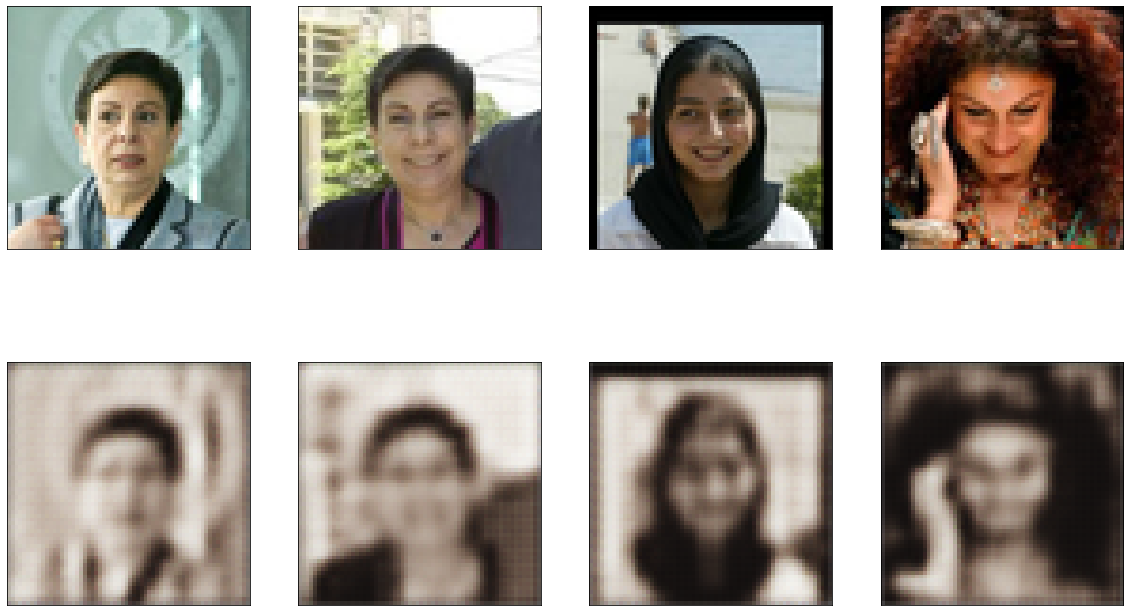

Running epoch 24/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:51 - loss: 0.9918 - acc: 0.633 - ETA: 1:40 - loss: 0.9954 - acc: 0.643 - ETA: 1:36 - loss: 0.9961 - acc: 0.647 - ETA: 1:33 - loss: 1.0014 - acc: 0.648 - ETA: 1:29 - loss: 0.9991 - acc: 0.651 - ETA: 1:26 - loss: 1.0024 - acc: 0.654 - ETA: 1:24 - loss: 0.9989 - acc: 0.654 - ETA: 1:21 - loss: 0.9994 - acc: 0.651 - ETA: 1:18 - loss: 0.9971 - acc: 0.652 - ETA: 1:16 - loss: 0.9990 - acc: 0.651 - ETA: 1:13 - loss: 1.0002 - acc: 0.650 - ETA: 1:10 - loss: 1.0014 - acc: 0.650 - ETA: 1:08 - loss: 1.0005 - acc: 0.653 - ETA: 1:04 - loss: 1.0011 - acc: 0.651 - ETA: 1:01 - loss: 1.0020 - acc: 0.652 - ETA: 58s - loss: 1.0029 - acc: 0.652 - ETA: 55s - loss: 1.0031 - acc: 0.65 - ETA: 52s - loss: 1.0029 - acc: 0.65 - ETA: 50s - loss: 1.0031 - acc: 0.65 - ETA: 47s - loss: 1.0033 - acc: 0.65 - ETA: 44s - loss: 1.0030 - acc: 0.65 - ETA: 41s - loss: 1.0036 - acc: 0.65 - ETA: 39s - loss: 1.0029 - acc: 0.65 - ETA: 36s - loss: 1.0

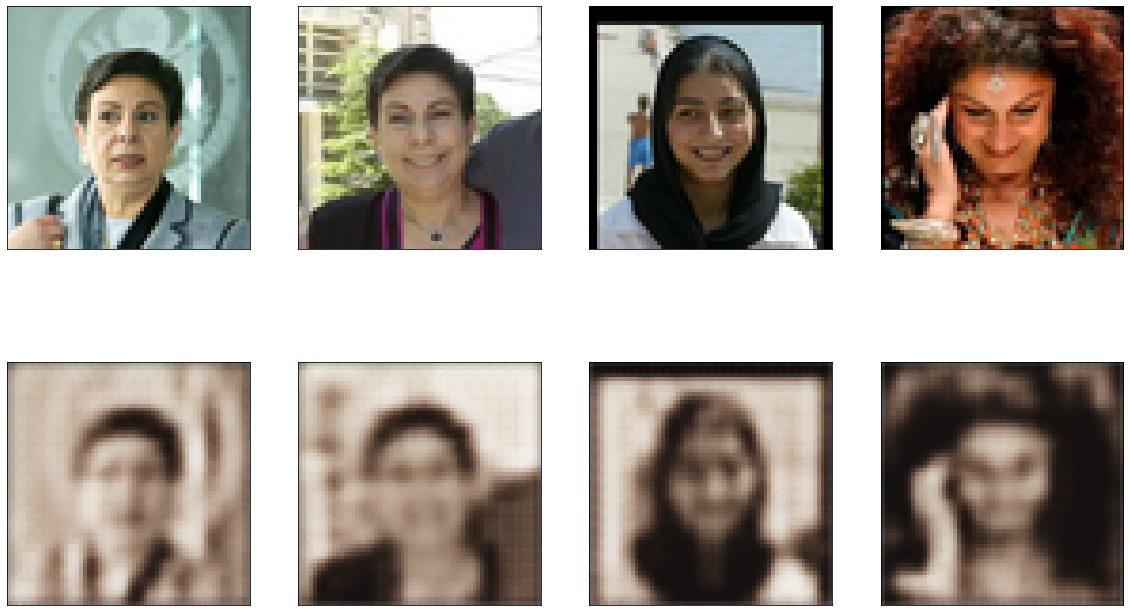

Running epoch 25/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:24 - loss: 0.9712 - acc: 0.634 - ETA: 1:15 - loss: 0.9896 - acc: 0.643 - ETA: 1:12 - loss: 0.9947 - acc: 0.646 - ETA: 1:09 - loss: 0.9999 - acc: 0.653 - ETA: 1:06 - loss: 1.0020 - acc: 0.647 - ETA: 1:04 - loss: 1.0037 - acc: 0.649 - ETA: 1:02 - loss: 1.0040 - acc: 0.655 - ETA: 1:00 - loss: 1.0041 - acc: 0.653 - ETA: 58s - loss: 1.0039 - acc: 0.655 - ETA: 56s - loss: 1.0050 - acc: 0.65 - ETA: 55s - loss: 1.0054 - acc: 0.65 - ETA: 52s - loss: 1.0063 - acc: 0.65 - ETA: 50s - loss: 1.0054 - acc: 0.65 - ETA: 48s - loss: 1.0062 - acc: 0.65 - ETA: 46s - loss: 1.0055 - acc: 0.65 - ETA: 44s - loss: 1.0059 - acc: 0.65 - ETA: 42s - loss: 1.0057 - acc: 0.65 - ETA: 40s - loss: 1.0064 - acc: 0.65 - ETA: 38s - loss: 1.0061 - acc: 0.65 - ETA: 36s - loss: 1.0067 - acc: 0.65 - ETA: 34s - loss: 1.0053 - acc: 0.65 - ETA: 32s - loss: 1.0058 - acc: 0.65 - ETA: 30s - loss: 1.0050 - acc: 0.65 - ETA: 28s - loss: 1.0055 - acc: 0.6

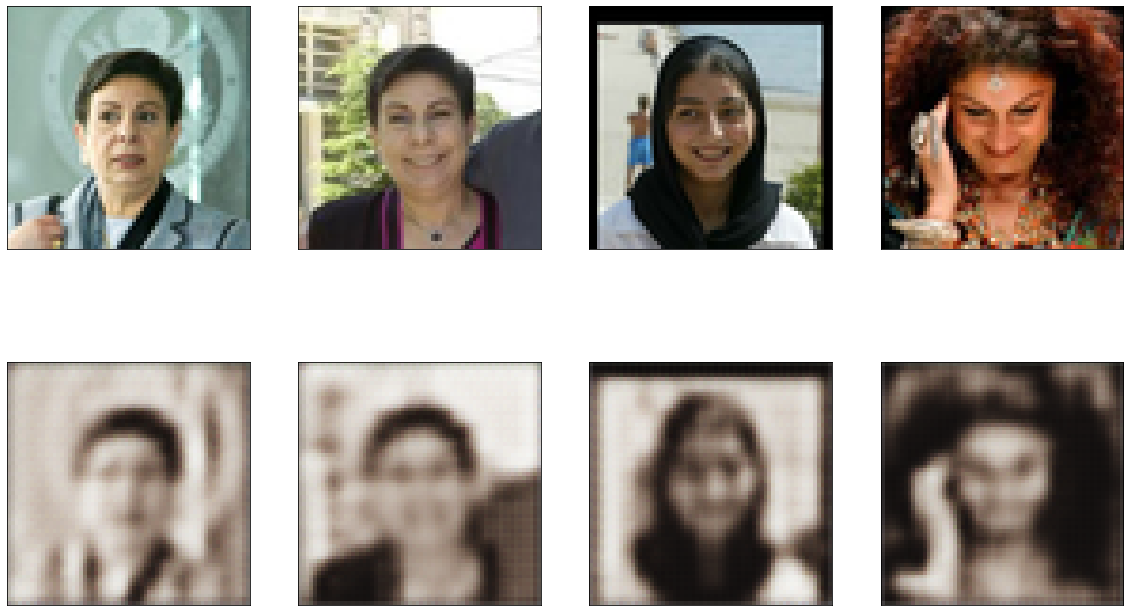

Running epoch 26/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:25 - loss: 0.9918 - acc: 0.652 - ETA: 1:17 - loss: 1.0012 - acc: 0.648 - ETA: 1:13 - loss: 1.0016 - acc: 0.650 - ETA: 1:10 - loss: 1.0054 - acc: 0.648 - ETA: 1:08 - loss: 1.0044 - acc: 0.653 - ETA: 1:05 - loss: 1.0045 - acc: 0.647 - ETA: 1:03 - loss: 1.0013 - acc: 0.650 - ETA: 1:01 - loss: 1.0032 - acc: 0.649 - ETA: 59s - loss: 1.0036 - acc: 0.652 - ETA: 57s - loss: 1.0046 - acc: 0.65 - ETA: 55s - loss: 1.0038 - acc: 0.65 - ETA: 53s - loss: 1.0041 - acc: 0.65 - ETA: 51s - loss: 1.0038 - acc: 0.65 - ETA: 49s - loss: 1.0045 - acc: 0.65 - ETA: 46s - loss: 1.0040 - acc: 0.65 - ETA: 44s - loss: 1.0047 - acc: 0.65 - ETA: 43s - loss: 1.0048 - acc: 0.65 - ETA: 41s - loss: 1.0054 - acc: 0.65 - ETA: 39s - loss: 1.0055 - acc: 0.65 - ETA: 37s - loss: 1.0057 - acc: 0.65 - ETA: 35s - loss: 1.0051 - acc: 0.65 - ETA: 33s - loss: 1.0055 - acc: 0.65 - ETA: 31s - loss: 1.0053 - acc: 0.65 - ETA: 29s - loss: 1.0057 - acc: 0.6

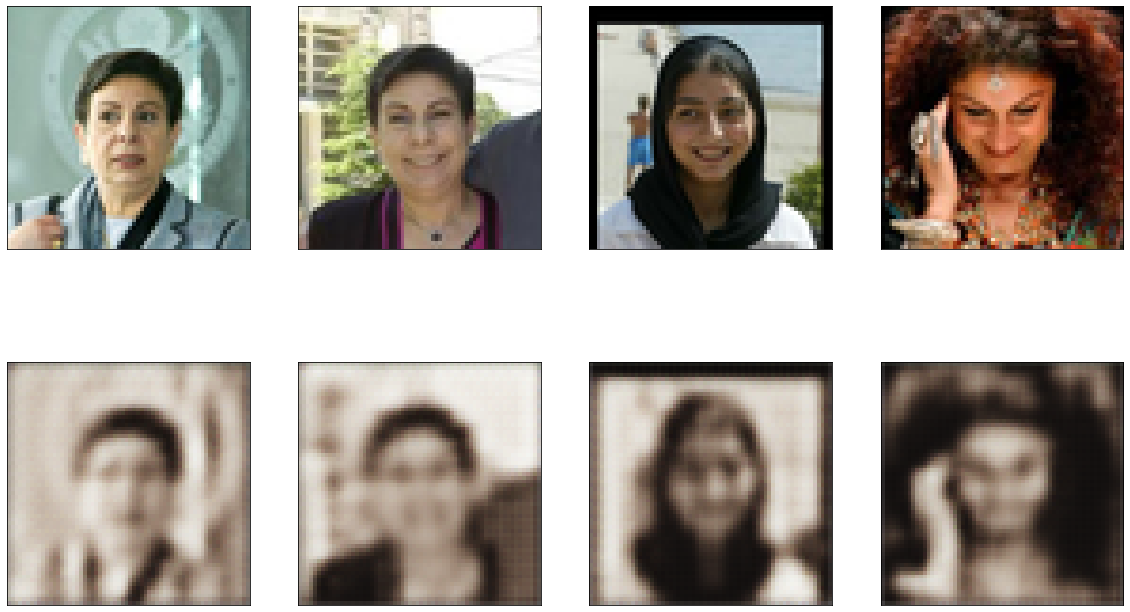

Running epoch 27/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:23 - loss: 1.0007 - acc: 0.659 - ETA: 1:18 - loss: 1.0057 - acc: 0.658 - ETA: 1:15 - loss: 1.0025 - acc: 0.663 - ETA: 1:12 - loss: 1.0049 - acc: 0.666 - ETA: 1:10 - loss: 1.0053 - acc: 0.667 - ETA: 1:07 - loss: 1.0070 - acc: 0.662 - ETA: 1:06 - loss: 1.0050 - acc: 0.660 - ETA: 1:04 - loss: 1.0055 - acc: 0.660 - ETA: 1:03 - loss: 1.0040 - acc: 0.661 - ETA: 1:01 - loss: 1.0051 - acc: 0.664 - ETA: 59s - loss: 1.0051 - acc: 0.662 - ETA: 57s - loss: 1.0060 - acc: 0.66 - ETA: 55s - loss: 1.0052 - acc: 0.65 - ETA: 53s - loss: 1.0053 - acc: 0.65 - ETA: 50s - loss: 1.0045 - acc: 0.65 - ETA: 48s - loss: 1.0046 - acc: 0.65 - ETA: 46s - loss: 1.0038 - acc: 0.65 - ETA: 43s - loss: 1.0041 - acc: 0.65 - ETA: 41s - loss: 1.0042 - acc: 0.65 - ETA: 39s - loss: 1.0046 - acc: 0.65 - ETA: 37s - loss: 1.0039 - acc: 0.65 - ETA: 35s - loss: 1.0043 - acc: 0.65 - ETA: 32s - loss: 1.0044 - acc: 0.65 - ETA: 30s - loss: 1.0045 - acc:

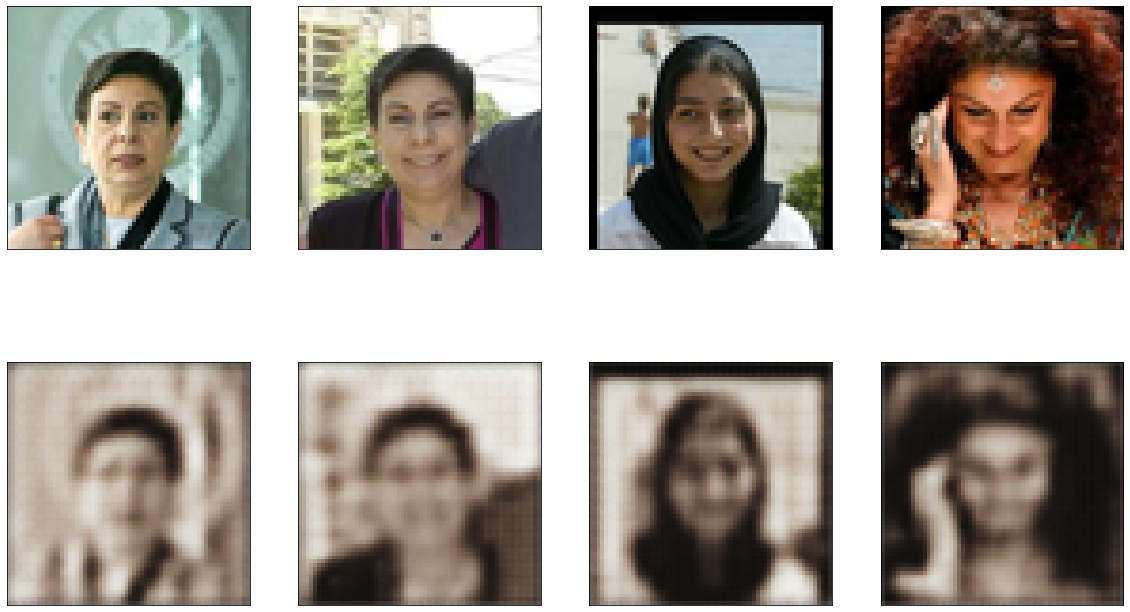

Running epoch 28/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:24 - loss: 1.0123 - acc: 0.645 - ETA: 1:20 - loss: 1.0116 - acc: 0.655 - ETA: 1:18 - loss: 1.0087 - acc: 0.658 - ETA: 1:15 - loss: 1.0092 - acc: 0.660 - ETA: 1:13 - loss: 1.0062 - acc: 0.653 - ETA: 1:10 - loss: 1.0077 - acc: 0.652 - ETA: 1:07 - loss: 1.0084 - acc: 0.652 - ETA: 1:06 - loss: 1.0085 - acc: 0.648 - ETA: 1:05 - loss: 1.0054 - acc: 0.650 - ETA: 1:04 - loss: 1.0064 - acc: 0.651 - ETA: 1:02 - loss: 1.0061 - acc: 0.653 - ETA: 1:00 - loss: 1.0068 - acc: 0.654 - ETA: 58s - loss: 1.0065 - acc: 0.654 - ETA: 57s - loss: 1.0070 - acc: 0.65 - ETA: 56s - loss: 1.0064 - acc: 0.65 - ETA: 55s - loss: 1.0069 - acc: 0.64 - ETA: 53s - loss: 1.0072 - acc: 0.65 - ETA: 50s - loss: 1.0072 - acc: 0.65 - ETA: 48s - loss: 1.0063 - acc: 0.65 - ETA: 46s - loss: 1.0067 - acc: 0.65 - ETA: 44s - loss: 1.0063 - acc: 0.65 - ETA: 42s - loss: 1.0067 - acc: 0.64 - ETA: 39s - loss: 1.0062 - acc: 0.64 - ETA: 37s - loss: 1.0064 - 

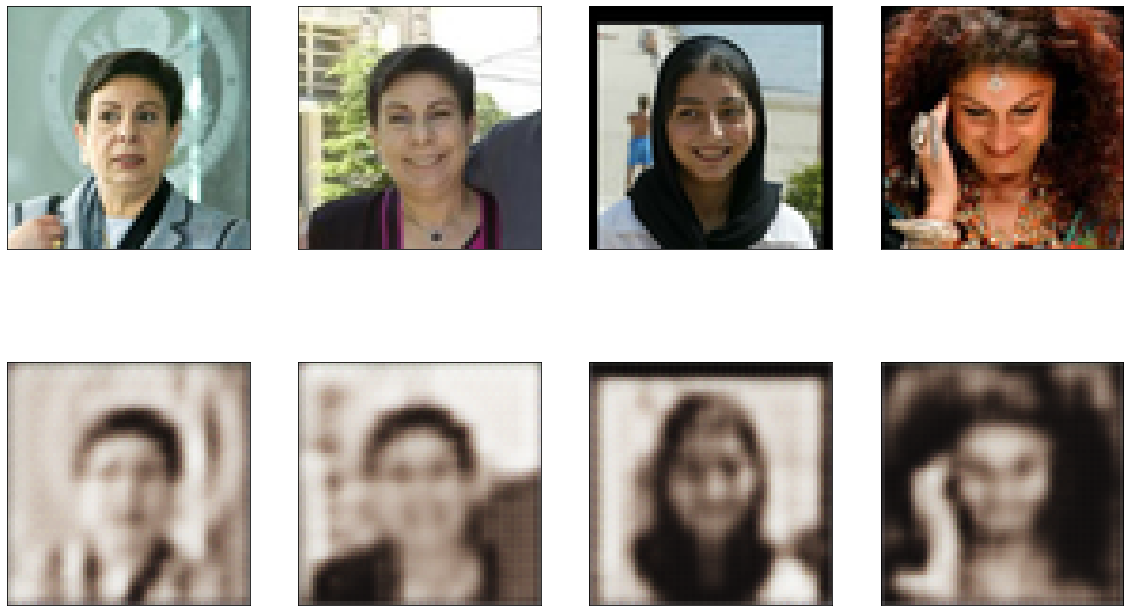

Running epoch 29/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:19 - loss: 0.9956 - acc: 0.644 - ETA: 1:13 - loss: 1.0027 - acc: 0.638 - ETA: 1:15 - loss: 1.0044 - acc: 0.636 - ETA: 1:10 - loss: 1.0059 - acc: 0.639 - ETA: 1:07 - loss: 1.0055 - acc: 0.645 - ETA: 1:05 - loss: 1.0057 - acc: 0.648 - ETA: 1:03 - loss: 1.0055 - acc: 0.647 - ETA: 1:00 - loss: 1.0058 - acc: 0.644 - ETA: 58s - loss: 1.0055 - acc: 0.643 - ETA: 56s - loss: 1.0065 - acc: 0.64 - ETA: 54s - loss: 1.0053 - acc: 0.64 - ETA: 52s - loss: 1.0051 - acc: 0.64 - ETA: 50s - loss: 1.0052 - acc: 0.65 - ETA: 49s - loss: 1.0059 - acc: 0.65 - ETA: 47s - loss: 1.0042 - acc: 0.65 - ETA: 45s - loss: 1.0049 - acc: 0.65 - ETA: 43s - loss: 1.0045 - acc: 0.65 - ETA: 41s - loss: 1.0050 - acc: 0.65 - ETA: 39s - loss: 1.0050 - acc: 0.65 - ETA: 37s - loss: 1.0048 - acc: 0.65 - ETA: 35s - loss: 1.0049 - acc: 0.65 - ETA: 33s - loss: 1.0053 - acc: 0.65 - ETA: 31s - loss: 1.0054 - acc: 0.65 - ETA: 29s - loss: 1.0059 - acc: 0.6

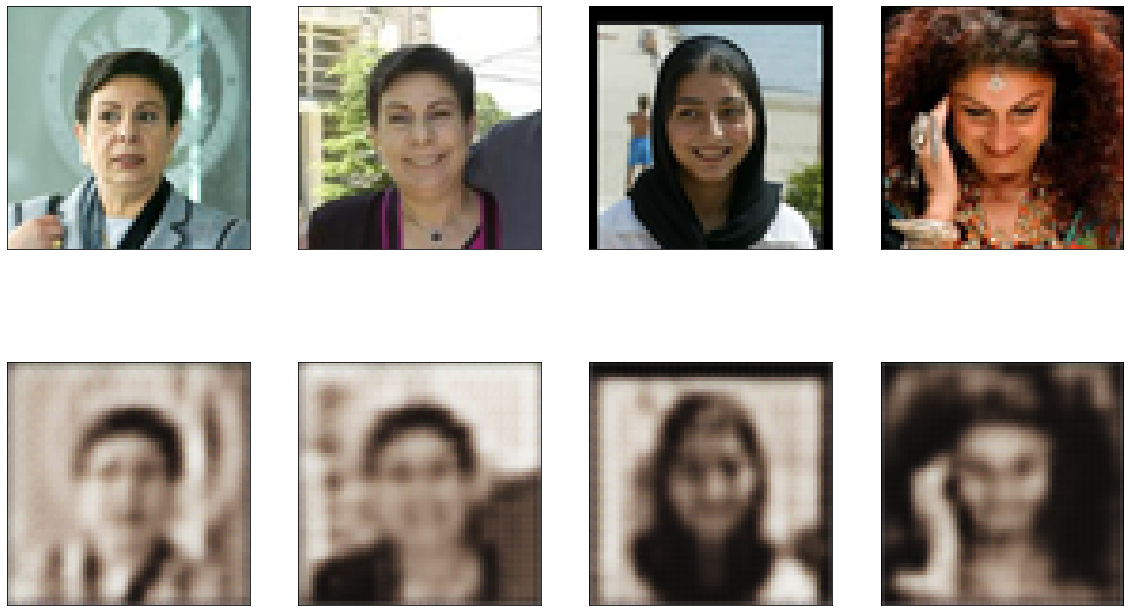

Running epoch 30/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:28 - loss: 0.9954 - acc: 0.654 - ETA: 1:18 - loss: 1.0040 - acc: 0.642 - ETA: 1:14 - loss: 1.0071 - acc: 0.646 - ETA: 1:10 - loss: 1.0084 - acc: 0.649 - ETA: 1:08 - loss: 1.0090 - acc: 0.647 - ETA: 1:06 - loss: 1.0090 - acc: 0.645 - ETA: 1:03 - loss: 1.0095 - acc: 0.646 - ETA: 1:00 - loss: 1.0099 - acc: 0.647 - ETA: 58s - loss: 1.0089 - acc: 0.645 - ETA: 56s - loss: 1.0087 - acc: 0.64 - ETA: 54s - loss: 1.0079 - acc: 0.64 - ETA: 52s - loss: 1.0075 - acc: 0.64 - ETA: 50s - loss: 1.0079 - acc: 0.64 - ETA: 48s - loss: 1.0083 - acc: 0.64 - ETA: 46s - loss: 1.0076 - acc: 0.64 - ETA: 44s - loss: 1.0081 - acc: 0.64 - ETA: 41s - loss: 1.0082 - acc: 0.64 - ETA: 40s - loss: 1.0086 - acc: 0.64 - ETA: 38s - loss: 1.0069 - acc: 0.65 - ETA: 36s - loss: 1.0074 - acc: 0.64 - ETA: 34s - loss: 1.0074 - acc: 0.64 - ETA: 32s - loss: 1.0078 - acc: 0.64 - ETA: 30s - loss: 1.0074 - acc: 0.64 - ETA: 28s - loss: 1.0075 - acc: 0.6

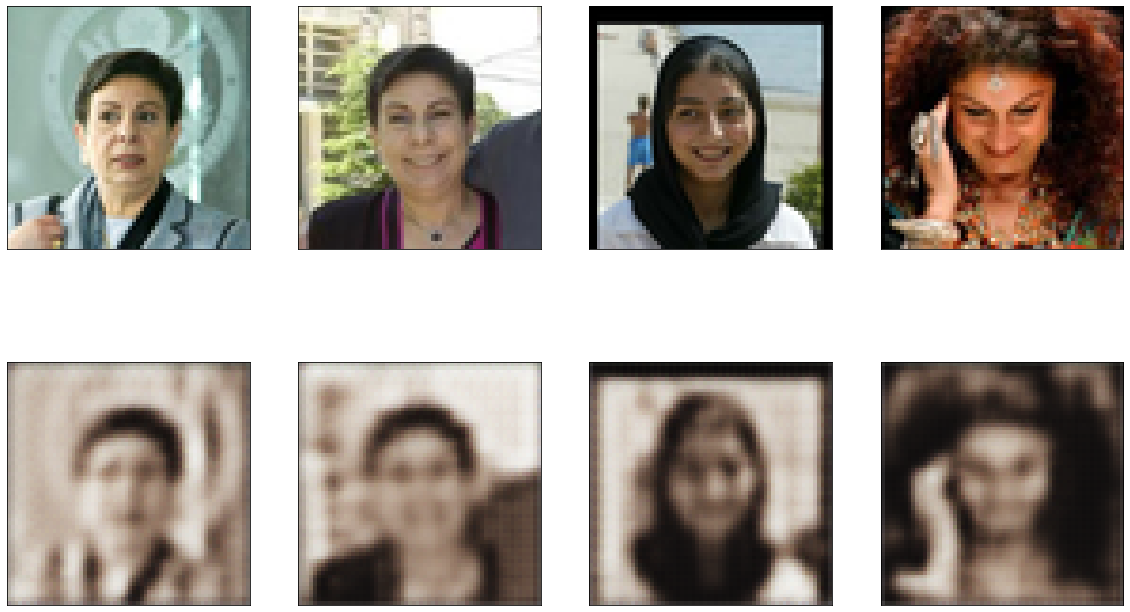

Running epoch 31/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:25 - loss: 1.0136 - acc: 0.674 - ETA: 1:22 - loss: 1.0097 - acc: 0.659 - ETA: 1:15 - loss: 1.0107 - acc: 0.666 - ETA: 1:11 - loss: 1.0094 - acc: 0.662 - ETA: 1:08 - loss: 1.0069 - acc: 0.659 - ETA: 1:06 - loss: 1.0072 - acc: 0.659 - ETA: 1:04 - loss: 1.0064 - acc: 0.660 - ETA: 1:02 - loss: 1.0074 - acc: 0.658 - ETA: 59s - loss: 1.0074 - acc: 0.657 - ETA: 57s - loss: 1.0078 - acc: 0.65 - ETA: 55s - loss: 1.0083 - acc: 0.65 - ETA: 52s - loss: 1.0074 - acc: 0.65 - ETA: 50s - loss: 1.0078 - acc: 0.65 - ETA: 48s - loss: 1.0082 - acc: 0.65 - ETA: 46s - loss: 1.0076 - acc: 0.65 - ETA: 44s - loss: 1.0080 - acc: 0.65 - ETA: 43s - loss: 1.0079 - acc: 0.65 - ETA: 41s - loss: 1.0080 - acc: 0.65 - ETA: 39s - loss: 1.0076 - acc: 0.65 - ETA: 37s - loss: 1.0080 - acc: 0.65 - ETA: 36s - loss: 1.0075 - acc: 0.65 - ETA: 34s - loss: 1.0078 - acc: 0.65 - ETA: 32s - loss: 1.0078 - acc: 0.65 - ETA: 30s - loss: 1.0081 - acc: 0.6

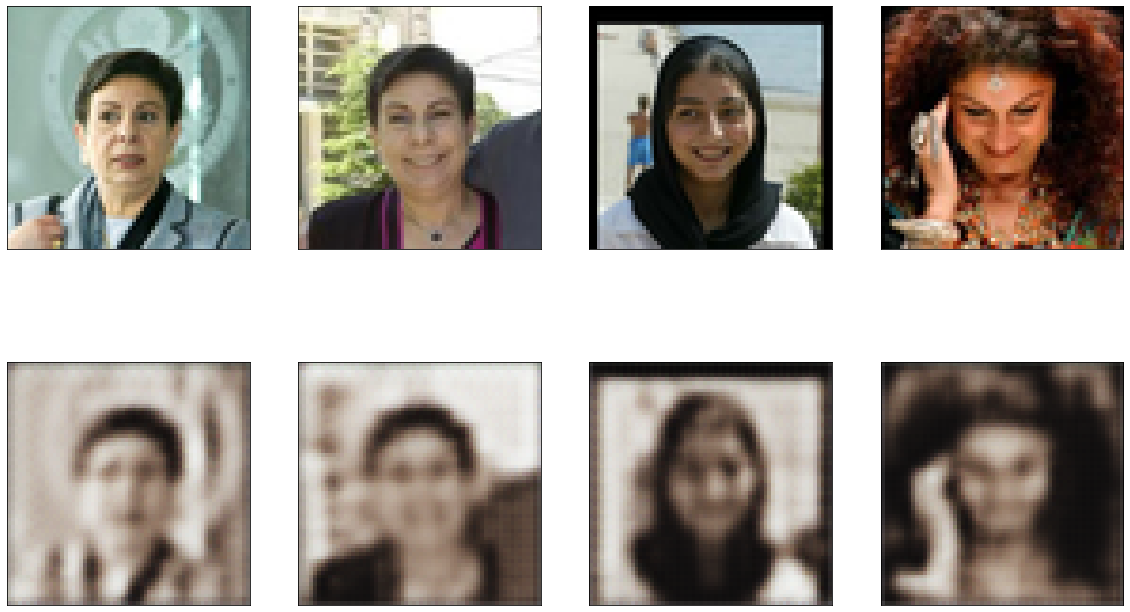

Running epoch 32/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:24 - loss: 0.9973 - acc: 0.632 - ETA: 1:19 - loss: 1.0052 - acc: 0.659 - ETA: 1:13 - loss: 1.0056 - acc: 0.652 - ETA: 1:09 - loss: 1.0076 - acc: 0.652 - ETA: 1:07 - loss: 1.0046 - acc: 0.650 - ETA: 1:05 - loss: 1.0059 - acc: 0.647 - ETA: 1:02 - loss: 1.0058 - acc: 0.646 - ETA: 1:00 - loss: 1.0068 - acc: 0.646 - ETA: 59s - loss: 1.0066 - acc: 0.646 - ETA: 57s - loss: 1.0070 - acc: 0.64 - ETA: 55s - loss: 1.0059 - acc: 0.65 - ETA: 53s - loss: 1.0063 - acc: 0.65 - ETA: 51s - loss: 1.0060 - acc: 0.64 - ETA: 49s - loss: 1.0065 - acc: 0.64 - ETA: 47s - loss: 1.0066 - acc: 0.64 - ETA: 45s - loss: 1.0070 - acc: 0.65 - ETA: 43s - loss: 1.0066 - acc: 0.64 - ETA: 41s - loss: 1.0069 - acc: 0.64 - ETA: 39s - loss: 1.0071 - acc: 0.64 - ETA: 37s - loss: 1.0075 - acc: 0.64 - ETA: 35s - loss: 1.0069 - acc: 0.65 - ETA: 33s - loss: 1.0072 - acc: 0.64 - ETA: 31s - loss: 1.0067 - acc: 0.65 - ETA: 29s - loss: 1.0071 - acc: 0.6

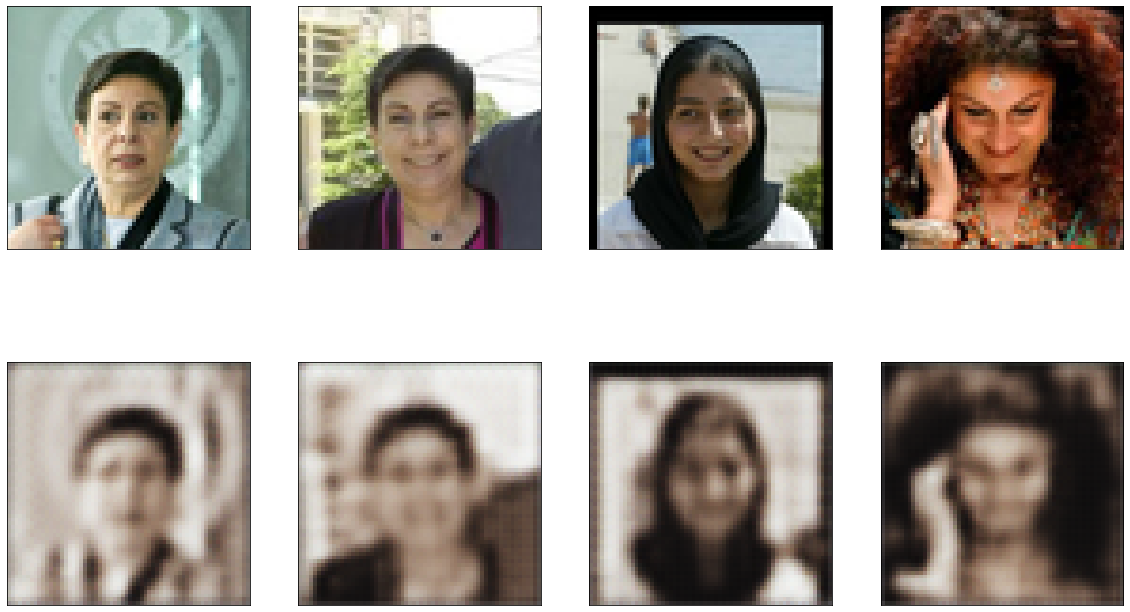

Running epoch 33/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:22 - loss: 1.0070 - acc: 0.646 - ETA: 1:14 - loss: 1.0092 - acc: 0.650 - ETA: 1:11 - loss: 1.0047 - acc: 0.644 - ETA: 1:09 - loss: 1.0069 - acc: 0.640 - ETA: 1:06 - loss: 1.0042 - acc: 0.646 - ETA: 1:04 - loss: 1.0058 - acc: 0.646 - ETA: 1:03 - loss: 1.0069 - acc: 0.645 - ETA: 1:00 - loss: 1.0078 - acc: 0.645 - ETA: 58s - loss: 1.0046 - acc: 0.645 - ETA: 56s - loss: 1.0054 - acc: 0.64 - ETA: 54s - loss: 1.0061 - acc: 0.64 - ETA: 52s - loss: 1.0061 - acc: 0.64 - ETA: 50s - loss: 1.0066 - acc: 0.64 - ETA: 49s - loss: 1.0071 - acc: 0.64 - ETA: 47s - loss: 1.0065 - acc: 0.64 - ETA: 45s - loss: 1.0070 - acc: 0.64 - ETA: 43s - loss: 1.0059 - acc: 0.64 - ETA: 41s - loss: 1.0064 - acc: 0.64 - ETA: 39s - loss: 1.0060 - acc: 0.64 - ETA: 37s - loss: 1.0064 - acc: 0.64 - ETA: 35s - loss: 1.0062 - acc: 0.64 - ETA: 33s - loss: 1.0065 - acc: 0.64 - ETA: 31s - loss: 1.0066 - acc: 0.64 - ETA: 29s - loss: 1.0070 - acc: 0.6

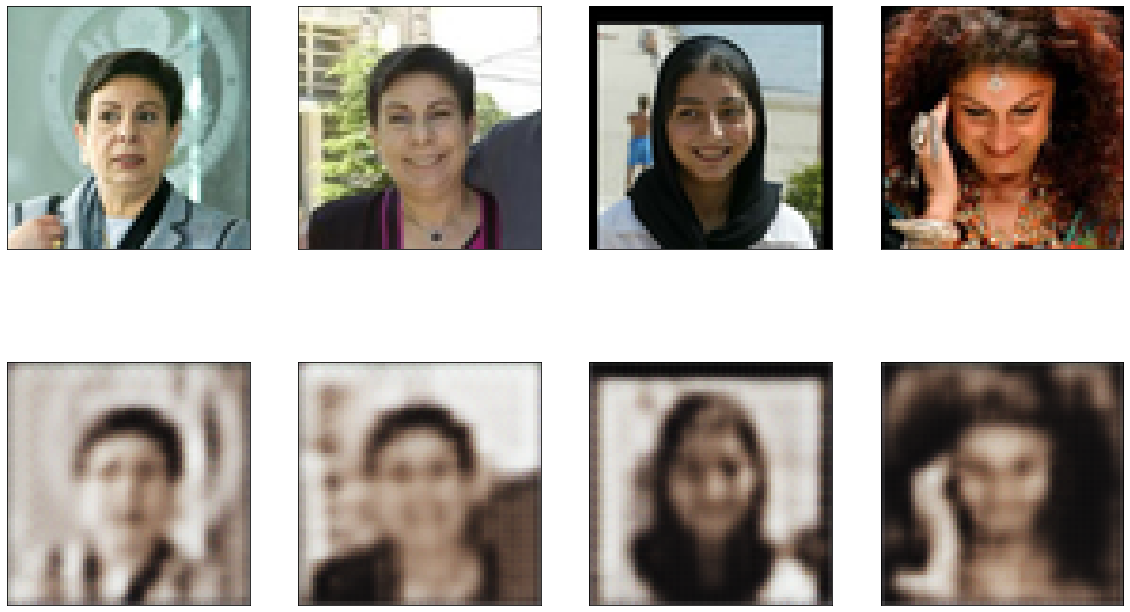

Running epoch 34/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:21 - loss: 0.9948 - acc: 0.666 - ETA: 1:15 - loss: 1.0040 - acc: 0.650 - ETA: 1:11 - loss: 1.0057 - acc: 0.656 - ETA: 1:09 - loss: 1.0041 - acc: 0.650 - ETA: 1:06 - loss: 1.0025 - acc: 0.644 - ETA: 1:05 - loss: 1.0044 - acc: 0.639 - ETA: 1:02 - loss: 1.0039 - acc: 0.637 - ETA: 1:00 - loss: 1.0052 - acc: 0.638 - ETA: 58s - loss: 1.0048 - acc: 0.640 - ETA: 56s - loss: 1.0057 - acc: 0.64 - ETA: 54s - loss: 1.0064 - acc: 0.64 - ETA: 53s - loss: 1.0070 - acc: 0.63 - ETA: 51s - loss: 1.0065 - acc: 0.63 - ETA: 48s - loss: 1.0071 - acc: 0.63 - ETA: 46s - loss: 1.0069 - acc: 0.63 - ETA: 45s - loss: 1.0071 - acc: 0.63 - ETA: 42s - loss: 1.0059 - acc: 0.63 - ETA: 40s - loss: 1.0063 - acc: 0.63 - ETA: 38s - loss: 1.0060 - acc: 0.63 - ETA: 36s - loss: 1.0063 - acc: 0.63 - ETA: 34s - loss: 1.0066 - acc: 0.63 - ETA: 32s - loss: 1.0065 - acc: 0.63 - ETA: 30s - loss: 1.0064 - acc: 0.63 - ETA: 29s - loss: 1.0066 - acc: 0.6

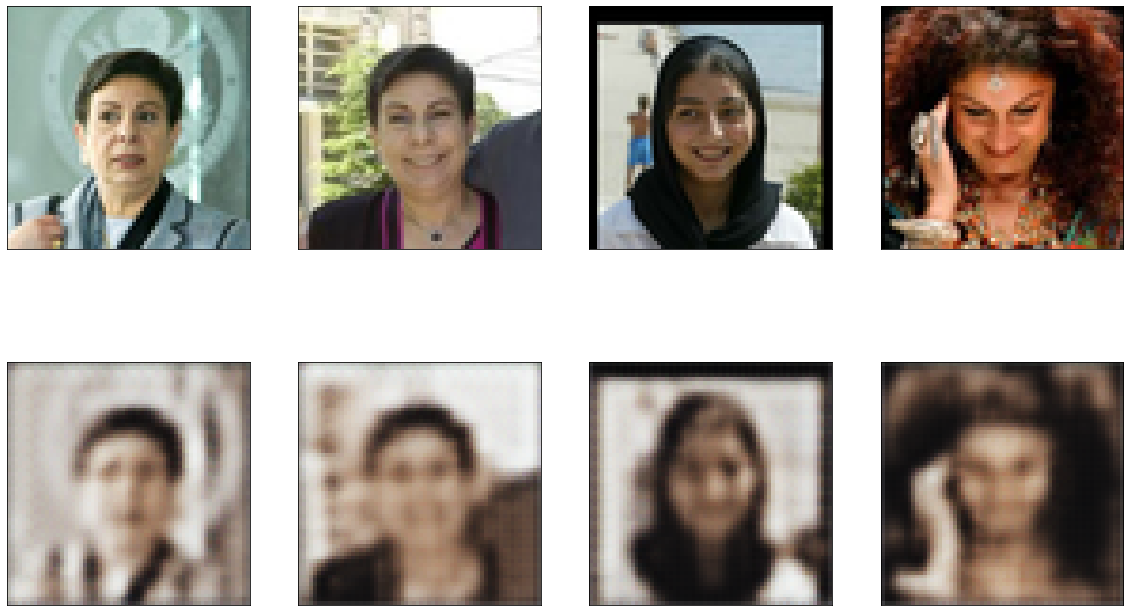

Running epoch 35/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:30 - loss: 1.0128 - acc: 0.625 - ETA: 1:26 - loss: 1.0129 - acc: 0.632 - ETA: 1:20 - loss: 1.0096 - acc: 0.630 - ETA: 1:18 - loss: 1.0091 - acc: 0.632 - ETA: 1:16 - loss: 1.0098 - acc: 0.633 - ETA: 1:13 - loss: 1.0096 - acc: 0.634 - ETA: 1:11 - loss: 1.0089 - acc: 0.630 - ETA: 1:08 - loss: 1.0095 - acc: 0.632 - ETA: 1:05 - loss: 1.0094 - acc: 0.633 - ETA: 1:02 - loss: 1.0099 - acc: 0.632 - ETA: 59s - loss: 1.0093 - acc: 0.629 - ETA: 57s - loss: 1.0097 - acc: 0.63 - ETA: 54s - loss: 1.0095 - acc: 0.63 - ETA: 52s - loss: 1.0098 - acc: 0.62 - ETA: 50s - loss: 1.0090 - acc: 0.63 - ETA: 47s - loss: 1.0093 - acc: 0.62 - ETA: 45s - loss: 1.0086 - acc: 0.62 - ETA: 43s - loss: 1.0088 - acc: 0.63 - ETA: 40s - loss: 1.0086 - acc: 0.63 - ETA: 38s - loss: 1.0089 - acc: 0.62 - ETA: 36s - loss: 1.0083 - acc: 0.62 - ETA: 34s - loss: 1.0085 - acc: 0.62 - ETA: 33s - loss: 1.0082 - acc: 0.62 - ETA: 31s - loss: 1.0084 - acc:

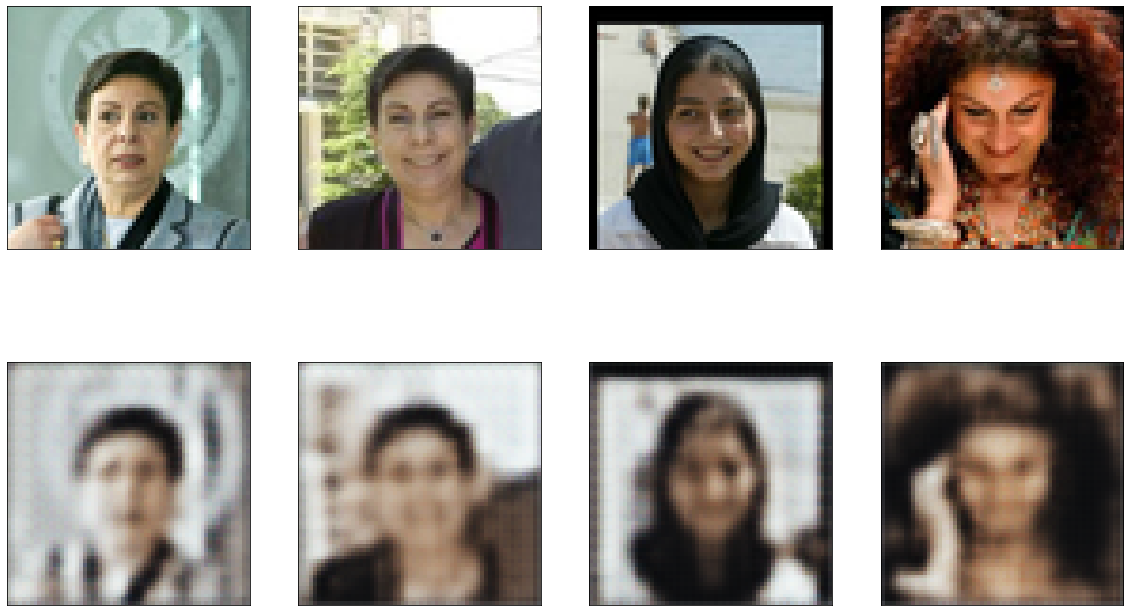

Running epoch 36/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:25 - loss: 1.0046 - acc: 0.624 - ETA: 1:18 - loss: 1.0058 - acc: 0.627 - ETA: 1:13 - loss: 1.0020 - acc: 0.633 - ETA: 1:09 - loss: 1.0033 - acc: 0.635 - ETA: 1:06 - loss: 1.0053 - acc: 0.637 - ETA: 1:04 - loss: 1.0067 - acc: 0.637 - ETA: 1:02 - loss: 1.0070 - acc: 0.634 - ETA: 1:00 - loss: 1.0077 - acc: 0.635 - ETA: 58s - loss: 1.0071 - acc: 0.637 - ETA: 56s - loss: 1.0076 - acc: 0.63 - ETA: 54s - loss: 1.0076 - acc: 0.63 - ETA: 53s - loss: 1.0080 - acc: 0.63 - ETA: 51s - loss: 1.0077 - acc: 0.63 - ETA: 49s - loss: 1.0081 - acc: 0.63 - ETA: 47s - loss: 1.0071 - acc: 0.63 - ETA: 45s - loss: 1.0071 - acc: 0.63 - ETA: 43s - loss: 1.0070 - acc: 0.63 - ETA: 41s - loss: 1.0073 - acc: 0.63 - ETA: 39s - loss: 1.0072 - acc: 0.63 - ETA: 37s - loss: 1.0074 - acc: 0.63 - ETA: 35s - loss: 1.0075 - acc: 0.63 - ETA: 33s - loss: 1.0077 - acc: 0.64 - ETA: 31s - loss: 1.0073 - acc: 0.64 - ETA: 29s - loss: 1.0076 - acc: 0.6

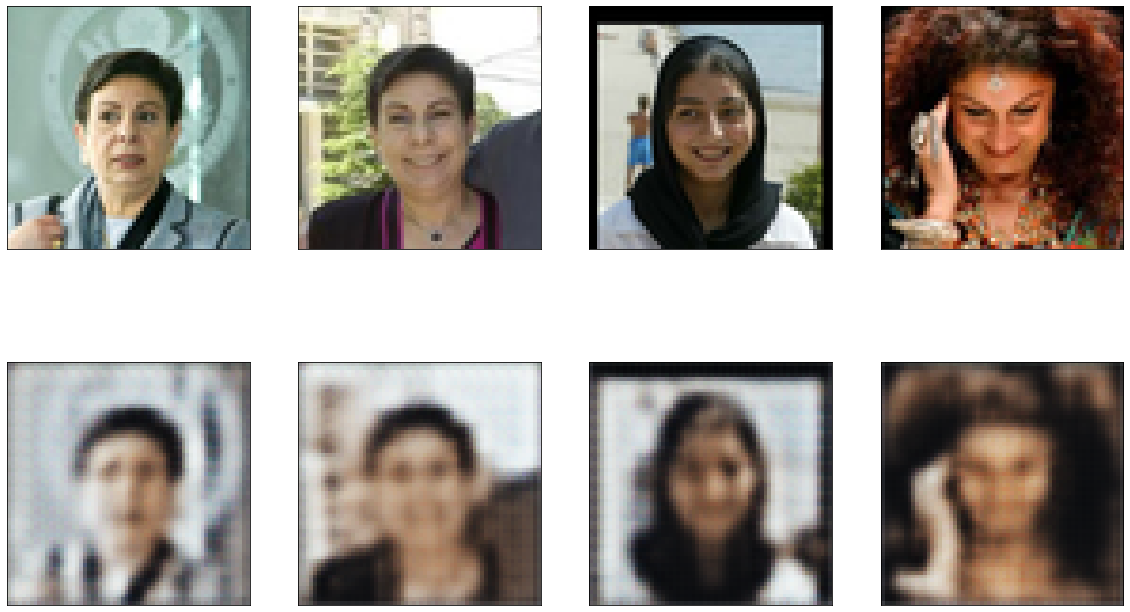

Running epoch 37/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:22 - loss: 1.0110 - acc: 0.666 - ETA: 1:16 - loss: 1.0072 - acc: 0.650 - ETA: 1:12 - loss: 1.0062 - acc: 0.650 - ETA: 1:08 - loss: 1.0077 - acc: 0.654 - ETA: 1:05 - loss: 1.0077 - acc: 0.653 - ETA: 1:04 - loss: 1.0072 - acc: 0.654 - ETA: 1:01 - loss: 1.0078 - acc: 0.651 - ETA: 59s - loss: 1.0084 - acc: 0.654 - ETA: 57s - loss: 1.0088 - acc: 0.65 - ETA: 55s - loss: 1.0092 - acc: 0.65 - ETA: 53s - loss: 1.0094 - acc: 0.65 - ETA: 51s - loss: 1.0085 - acc: 0.65 - ETA: 49s - loss: 1.0086 - acc: 0.65 - ETA: 47s - loss: 1.0088 - acc: 0.65 - ETA: 46s - loss: 1.0090 - acc: 0.65 - ETA: 44s - loss: 1.0090 - acc: 0.65 - ETA: 42s - loss: 1.0081 - acc: 0.65 - ETA: 40s - loss: 1.0079 - acc: 0.65 - ETA: 38s - loss: 1.0077 - acc: 0.65 - ETA: 36s - loss: 1.0079 - acc: 0.65 - ETA: 34s - loss: 1.0081 - acc: 0.65 - ETA: 32s - loss: 1.0083 - acc: 0.65 - ETA: 30s - loss: 1.0081 - acc: 0.65 - ETA: 29s - loss: 1.0083 - acc: 0.65 

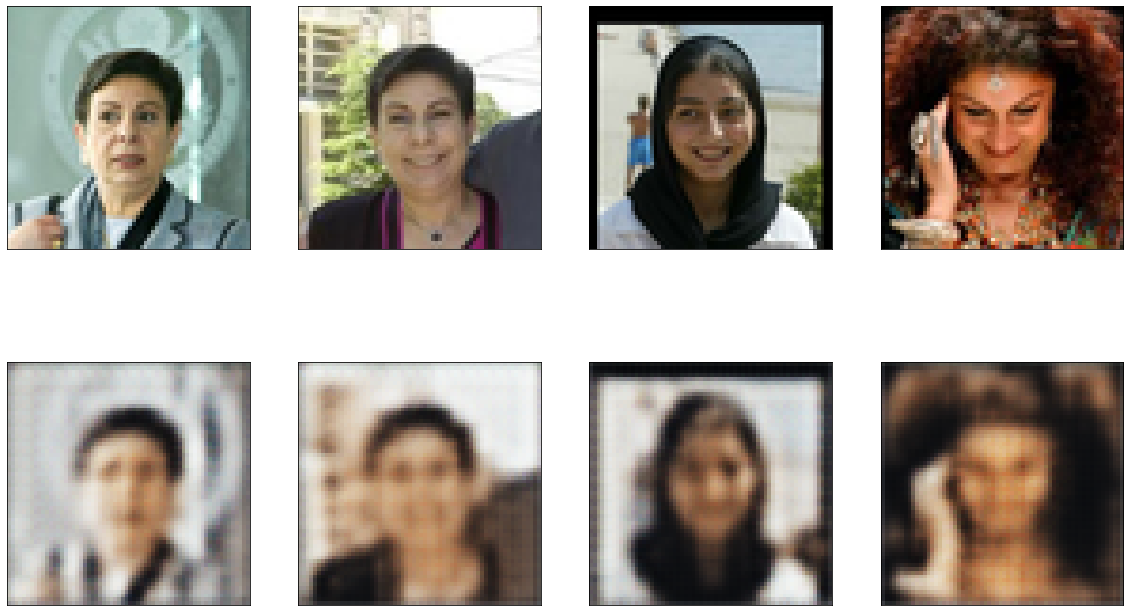

Running epoch 38/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:19 - loss: 1.0112 - acc: 0.660 - ETA: 1:16 - loss: 1.0080 - acc: 0.665 - ETA: 1:13 - loss: 1.0096 - acc: 0.664 - ETA: 1:11 - loss: 1.0098 - acc: 0.656 - ETA: 1:09 - loss: 1.0101 - acc: 0.662 - ETA: 1:07 - loss: 1.0103 - acc: 0.661 - ETA: 1:05 - loss: 1.0105 - acc: 0.661 - ETA: 1:03 - loss: 1.0106 - acc: 0.661 - ETA: 1:01 - loss: 1.0103 - acc: 0.660 - ETA: 58s - loss: 1.0104 - acc: 0.660 - ETA: 56s - loss: 1.0102 - acc: 0.65 - ETA: 54s - loss: 1.0104 - acc: 0.65 - ETA: 52s - loss: 1.0099 - acc: 0.65 - ETA: 49s - loss: 1.0100 - acc: 0.65 - ETA: 47s - loss: 1.0090 - acc: 0.65 - ETA: 45s - loss: 1.0092 - acc: 0.65 - ETA: 43s - loss: 1.0088 - acc: 0.65 - ETA: 41s - loss: 1.0084 - acc: 0.65 - ETA: 39s - loss: 1.0075 - acc: 0.65 - ETA: 37s - loss: 1.0072 - acc: 0.66 - ETA: 35s - loss: 1.0073 - acc: 0.66 - ETA: 33s - loss: 1.0075 - acc: 0.66 - ETA: 31s - loss: 1.0077 - acc: 0.66 - ETA: 29s - loss: 1.0079 - acc: 0

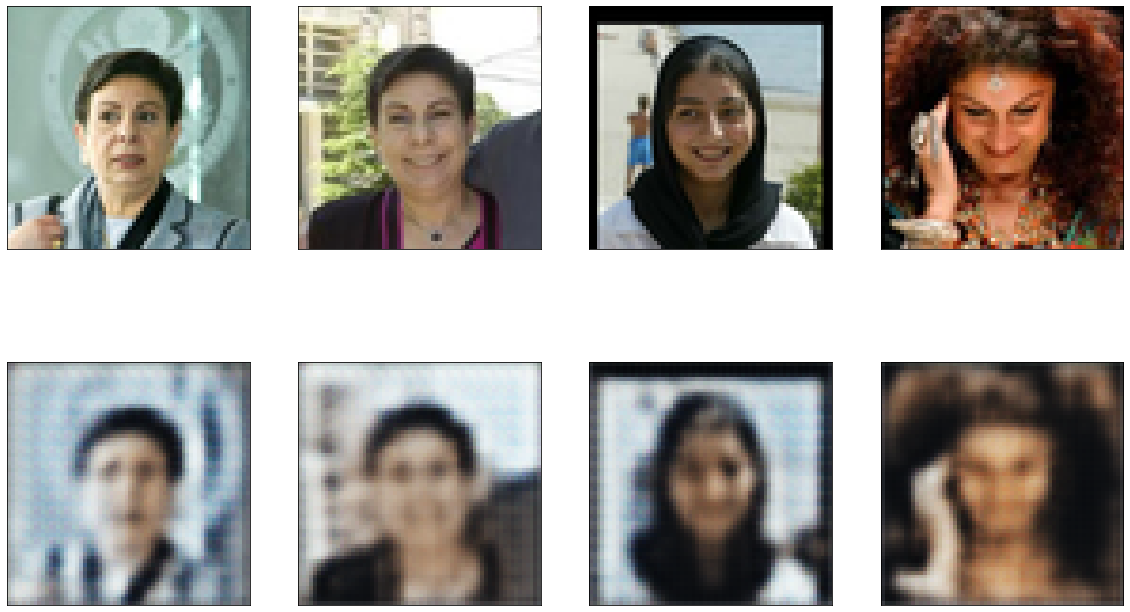

Running epoch 39/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:56 - loss: 1.0099 - acc: 0.642 - ETA: 1:44 - loss: 1.0108 - acc: 0.658 - ETA: 1:38 - loss: 1.0107 - acc: 0.660 - ETA: 1:33 - loss: 1.0108 - acc: 0.664 - ETA: 1:29 - loss: 1.0094 - acc: 0.663 - ETA: 1:26 - loss: 1.0096 - acc: 0.665 - ETA: 1:23 - loss: 1.0088 - acc: 0.665 - ETA: 1:20 - loss: 1.0067 - acc: 0.663 - ETA: 1:18 - loss: 1.0063 - acc: 0.663 - ETA: 1:15 - loss: 1.0068 - acc: 0.662 - ETA: 1:12 - loss: 1.0058 - acc: 0.666 - ETA: 1:09 - loss: 1.0063 - acc: 0.665 - ETA: 1:07 - loss: 1.0067 - acc: 0.665 - ETA: 1:04 - loss: 1.0070 - acc: 0.663 - ETA: 1:02 - loss: 1.0073 - acc: 0.664 - ETA: 59s - loss: 1.0075 - acc: 0.664 - ETA: 57s - loss: 1.0077 - acc: 0.66 - ETA: 54s - loss: 1.0079 - acc: 0.66 - ETA: 51s - loss: 1.0077 - acc: 0.66 - ETA: 49s - loss: 1.0079 - acc: 0.66 - ETA: 46s - loss: 1.0077 - acc: 0.66 - ETA: 43s - loss: 1.0078 - acc: 0.66 - ETA: 41s - loss: 1.0073 - acc: 0.66 - ETA: 38s - loss: 1.0

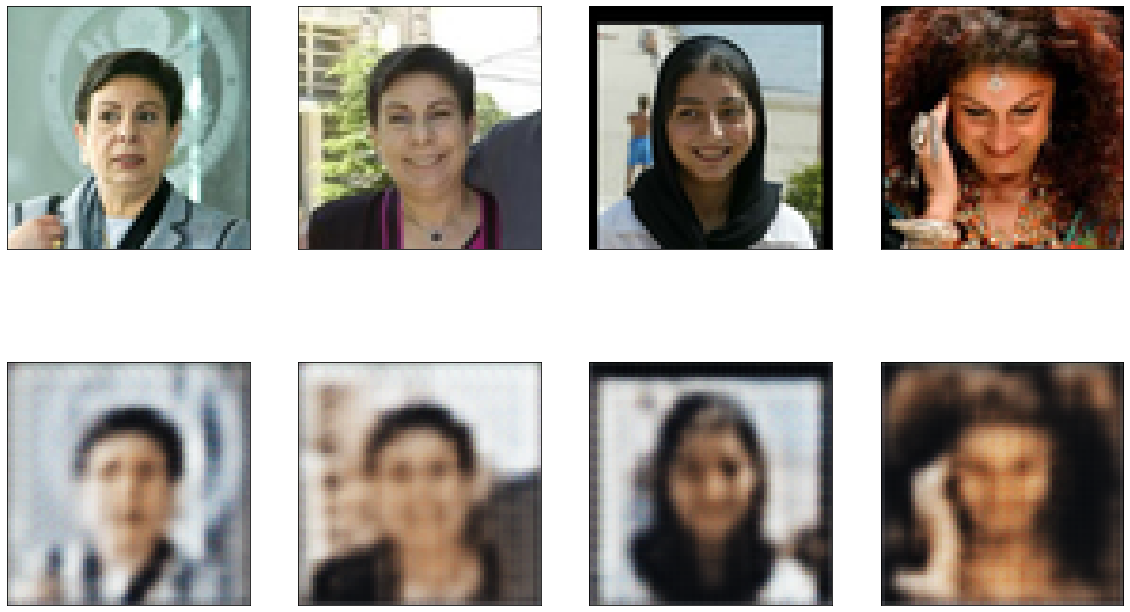

Running epoch 40/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:49 - loss: 1.0056 - acc: 0.693 - ETA: 1:40 - loss: 1.0083 - acc: 0.692 - ETA: 1:37 - loss: 1.0040 - acc: 0.687 - ETA: 1:32 - loss: 1.0058 - acc: 0.687 - ETA: 1:29 - loss: 1.0068 - acc: 0.684 - ETA: 1:26 - loss: 1.0077 - acc: 0.679 - ETA: 1:22 - loss: 1.0060 - acc: 0.669 - ETA: 1:20 - loss: 1.0068 - acc: 0.670 - ETA: 1:17 - loss: 1.0056 - acc: 0.667 - ETA: 1:14 - loss: 1.0062 - acc: 0.668 - ETA: 1:12 - loss: 1.0061 - acc: 0.667 - ETA: 1:09 - loss: 1.0065 - acc: 0.670 - ETA: 1:07 - loss: 1.0066 - acc: 0.671 - ETA: 1:04 - loss: 1.0063 - acc: 0.674 - ETA: 1:02 - loss: 1.0066 - acc: 0.676 - ETA: 59s - loss: 1.0063 - acc: 0.676 - ETA: 56s - loss: 1.0066 - acc: 0.67 - ETA: 54s - loss: 1.0062 - acc: 0.67 - ETA: 51s - loss: 1.0060 - acc: 0.67 - ETA: 48s - loss: 1.0059 - acc: 0.67 - ETA: 46s - loss: 1.0061 - acc: 0.67 - ETA: 43s - loss: 1.0064 - acc: 0.67 - ETA: 41s - loss: 1.0062 - acc: 0.67 - ETA: 38s - loss: 1.0

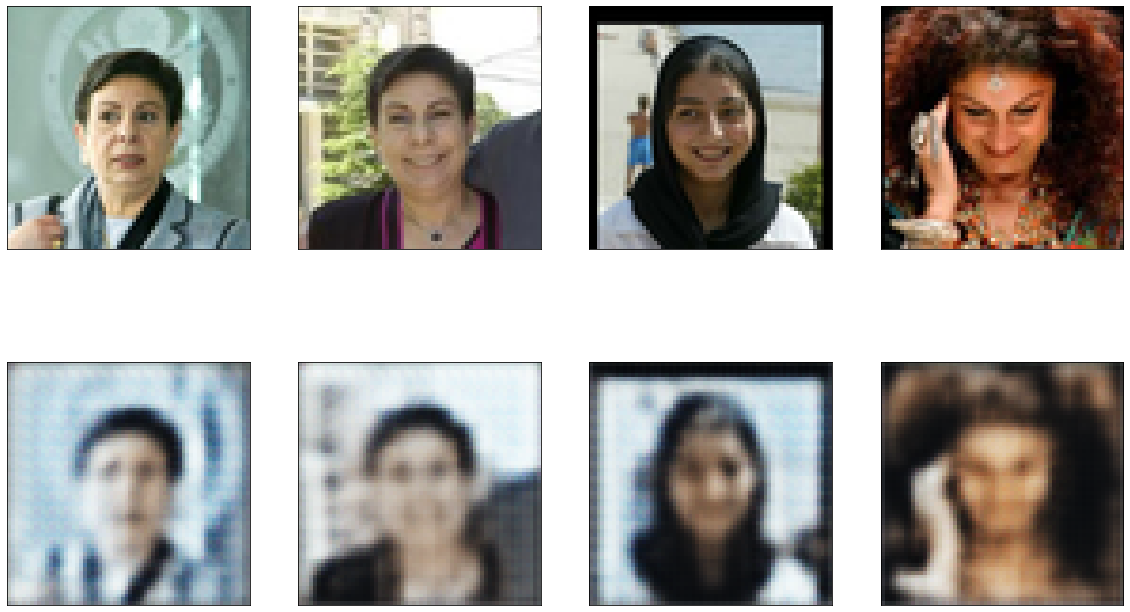

Running epoch 41/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:54 - loss: 0.9972 - acc: 0.620 - ETA: 1:45 - loss: 1.0061 - acc: 0.654 - ETA: 1:39 - loss: 1.0081 - acc: 0.669 - ETA: 1:35 - loss: 1.0089 - acc: 0.672 - ETA: 1:31 - loss: 1.0095 - acc: 0.671 - ETA: 1:28 - loss: 1.0086 - acc: 0.666 - ETA: 1:25 - loss: 1.0093 - acc: 0.667 - ETA: 1:22 - loss: 1.0090 - acc: 0.665 - ETA: 1:19 - loss: 1.0084 - acc: 0.670 - ETA: 1:16 - loss: 1.0075 - acc: 0.669 - ETA: 1:13 - loss: 1.0078 - acc: 0.672 - ETA: 1:10 - loss: 1.0076 - acc: 0.672 - ETA: 1:08 - loss: 1.0068 - acc: 0.674 - ETA: 1:05 - loss: 1.0070 - acc: 0.677 - ETA: 1:02 - loss: 1.0069 - acc: 0.677 - ETA: 59s - loss: 1.0070 - acc: 0.679 - ETA: 57s - loss: 1.0071 - acc: 0.67 - ETA: 54s - loss: 1.0073 - acc: 0.68 - ETA: 52s - loss: 1.0074 - acc: 0.67 - ETA: 49s - loss: 1.0075 - acc: 0.67 - ETA: 46s - loss: 1.0076 - acc: 0.68 - ETA: 44s - loss: 1.0073 - acc: 0.68 - ETA: 41s - loss: 1.0071 - acc: 0.68 - ETA: 38s - loss: 1.0

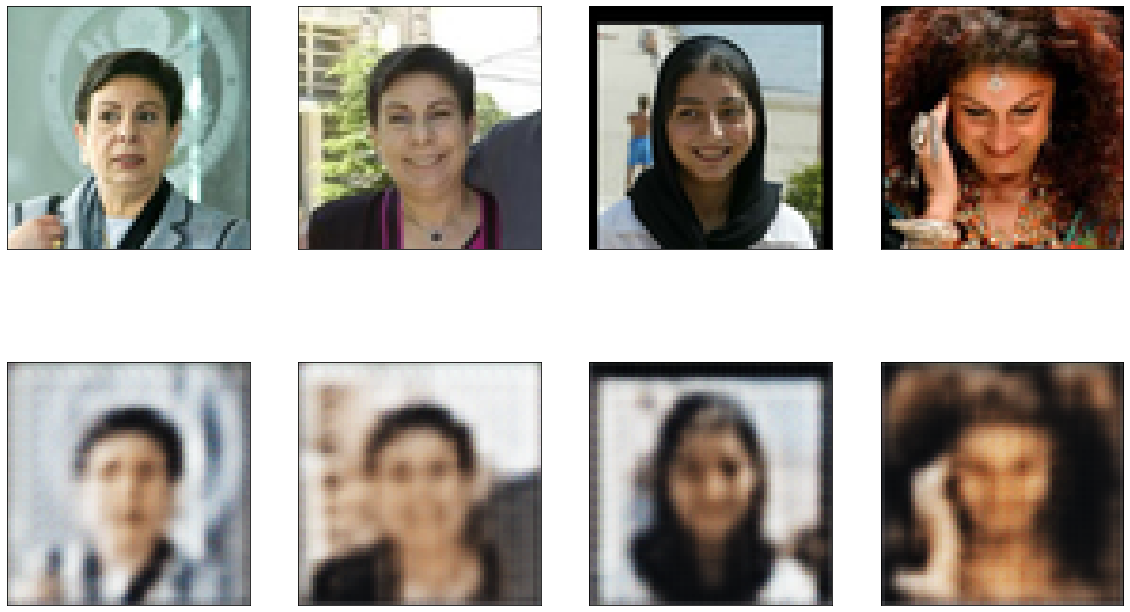

Running epoch 42/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:47 - loss: 1.0068 - acc: 0.711 - ETA: 1:39 - loss: 1.0094 - acc: 0.694 - ETA: 1:34 - loss: 1.0057 - acc: 0.698 - ETA: 1:30 - loss: 1.0072 - acc: 0.701 - ETA: 1:27 - loss: 1.0066 - acc: 0.697 - ETA: 1:24 - loss: 1.0074 - acc: 0.698 - ETA: 1:21 - loss: 1.0078 - acc: 0.691 - ETA: 1:19 - loss: 1.0082 - acc: 0.693 - ETA: 1:17 - loss: 1.0066 - acc: 0.693 - ETA: 1:14 - loss: 1.0067 - acc: 0.693 - ETA: 1:12 - loss: 1.0057 - acc: 0.690 - ETA: 1:10 - loss: 1.0060 - acc: 0.691 - ETA: 1:07 - loss: 1.0063 - acc: 0.692 - ETA: 1:04 - loss: 1.0066 - acc: 0.692 - ETA: 1:02 - loss: 1.0068 - acc: 0.691 - ETA: 59s - loss: 1.0069 - acc: 0.690 - ETA: 56s - loss: 1.0067 - acc: 0.69 - ETA: 54s - loss: 1.0069 - acc: 0.69 - ETA: 51s - loss: 1.0066 - acc: 0.69 - ETA: 49s - loss: 1.0068 - acc: 0.69 - ETA: 46s - loss: 1.0070 - acc: 0.69 - ETA: 43s - loss: 1.0072 - acc: 0.69 - ETA: 41s - loss: 1.0073 - acc: 0.69 - ETA: 38s - loss: 1.0

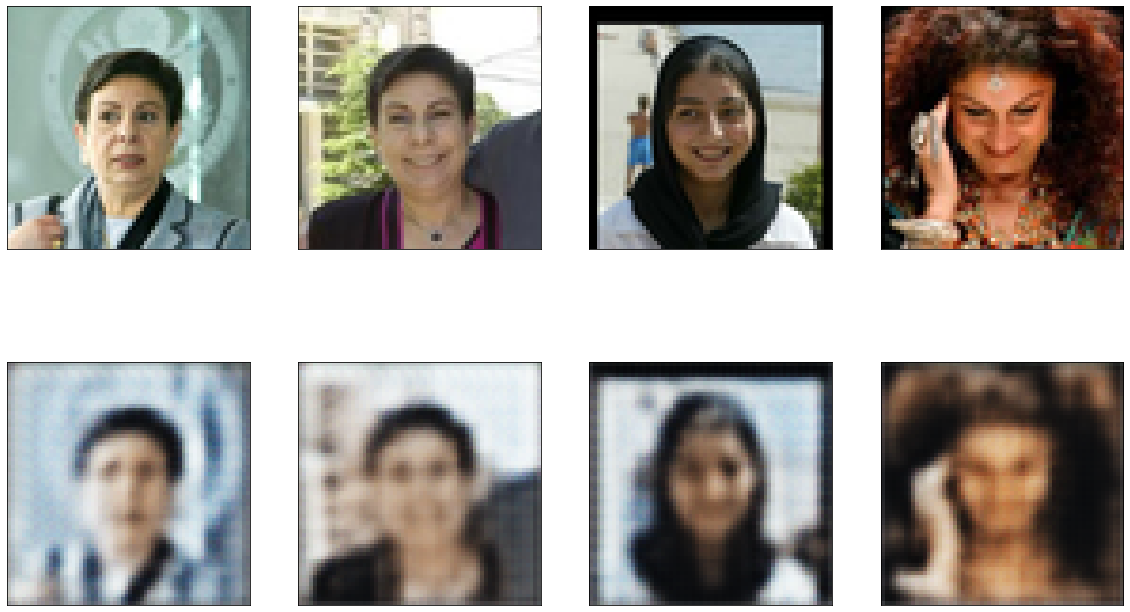

Running epoch 43/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:53 - loss: 1.0038 - acc: 0.655 - ETA: 1:45 - loss: 1.0076 - acc: 0.669 - ETA: 1:41 - loss: 1.0082 - acc: 0.678 - ETA: 1:38 - loss: 1.0073 - acc: 0.690 - ETA: 1:37 - loss: 1.0058 - acc: 0.694 - ETA: 1:34 - loss: 1.0067 - acc: 0.696 - ETA: 1:30 - loss: 1.0072 - acc: 0.696 - ETA: 1:27 - loss: 1.0064 - acc: 0.698 - ETA: 1:23 - loss: 1.0069 - acc: 0.701 - ETA: 1:20 - loss: 1.0073 - acc: 0.703 - ETA: 1:17 - loss: 1.0071 - acc: 0.700 - ETA: 1:13 - loss: 1.0075 - acc: 0.701 - ETA: 1:11 - loss: 1.0077 - acc: 0.700 - ETA: 1:08 - loss: 1.0080 - acc: 0.698 - ETA: 1:05 - loss: 1.0083 - acc: 0.698 - ETA: 1:02 - loss: 1.0077 - acc: 0.697 - ETA: 59s - loss: 1.0079 - acc: 0.696 - ETA: 56s - loss: 1.0080 - acc: 0.69 - ETA: 53s - loss: 1.0081 - acc: 0.69 - ETA: 50s - loss: 1.0078 - acc: 0.69 - ETA: 48s - loss: 1.0068 - acc: 0.70 - ETA: 45s - loss: 1.0070 - acc: 0.70 - ETA: 42s - loss: 1.0068 - acc: 0.69 - ETA: 39s - loss: 1

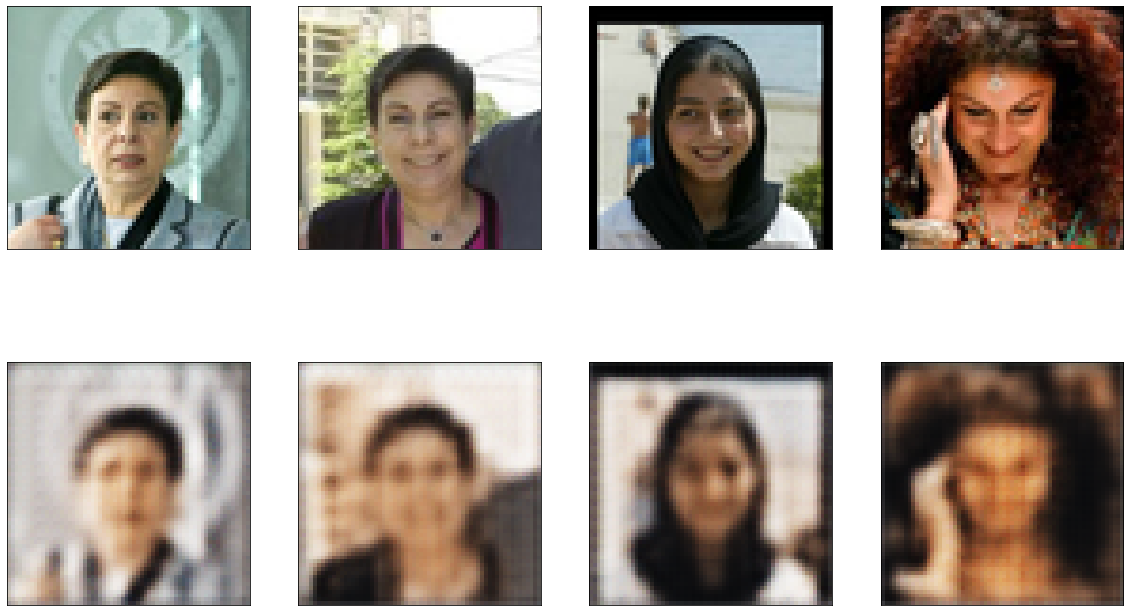

Running epoch 44/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:56 - loss: 1.0124 - acc: 0.699 - ETA: 1:45 - loss: 1.0114 - acc: 0.685 - ETA: 1:40 - loss: 1.0109 - acc: 0.687 - ETA: 1:35 - loss: 1.0107 - acc: 0.693 - ETA: 1:30 - loss: 1.0076 - acc: 0.693 - ETA: 1:27 - loss: 1.0055 - acc: 0.697 - ETA: 1:23 - loss: 1.0042 - acc: 0.699 - ETA: 1:21 - loss: 1.0048 - acc: 0.701 - ETA: 1:18 - loss: 1.0053 - acc: 0.700 - ETA: 1:15 - loss: 1.0059 - acc: 0.700 - ETA: 1:12 - loss: 1.0062 - acc: 0.697 - ETA: 1:09 - loss: 1.0066 - acc: 0.696 - ETA: 1:07 - loss: 1.0049 - acc: 0.694 - ETA: 1:05 - loss: 1.0053 - acc: 0.694 - ETA: 1:02 - loss: 1.0049 - acc: 0.693 - ETA: 59s - loss: 1.0053 - acc: 0.694 - ETA: 57s - loss: 1.0055 - acc: 0.69 - ETA: 54s - loss: 1.0058 - acc: 0.69 - ETA: 51s - loss: 1.0060 - acc: 0.69 - ETA: 49s - loss: 1.0062 - acc: 0.69 - ETA: 46s - loss: 1.0060 - acc: 0.69 - ETA: 44s - loss: 1.0062 - acc: 0.69 - ETA: 41s - loss: 1.0063 - acc: 0.69 - ETA: 38s - loss: 1.0

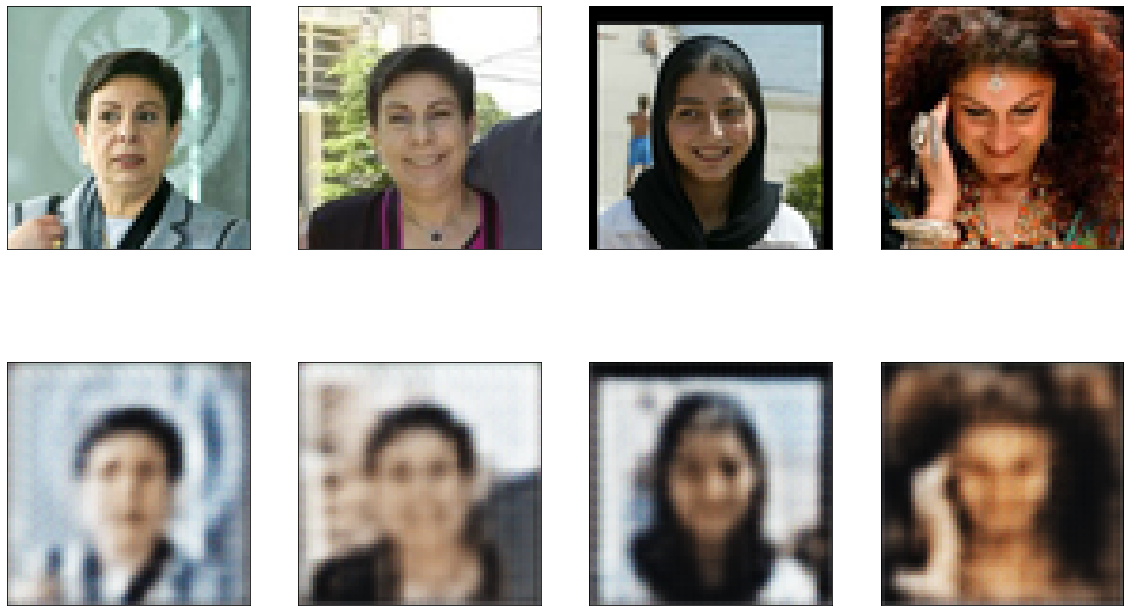

Running epoch 45/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:50 - loss: 1.0046 - acc: 0.700 - ETA: 1:40 - loss: 1.0080 - acc: 0.708 - ETA: 1:37 - loss: 1.0063 - acc: 0.707 - ETA: 1:34 - loss: 1.0074 - acc: 0.708 - ETA: 1:31 - loss: 1.0080 - acc: 0.713 - ETA: 1:28 - loss: 1.0072 - acc: 0.713 - ETA: 1:25 - loss: 1.0077 - acc: 0.714 - ETA: 1:21 - loss: 1.0080 - acc: 0.711 - ETA: 1:19 - loss: 1.0074 - acc: 0.712 - ETA: 1:16 - loss: 1.0077 - acc: 0.711 - ETA: 1:13 - loss: 1.0079 - acc: 0.710 - ETA: 1:11 - loss: 1.0080 - acc: 0.708 - ETA: 1:08 - loss: 1.0082 - acc: 0.710 - ETA: 1:05 - loss: 1.0072 - acc: 0.707 - ETA: 1:03 - loss: 1.0074 - acc: 0.708 - ETA: 1:00 - loss: 1.0075 - acc: 0.709 - ETA: 57s - loss: 1.0076 - acc: 0.709 - ETA: 55s - loss: 1.0077 - acc: 0.71 - ETA: 52s - loss: 1.0069 - acc: 0.71 - ETA: 50s - loss: 1.0066 - acc: 0.71 - ETA: 48s - loss: 1.0067 - acc: 0.71 - ETA: 45s - loss: 1.0065 - acc: 0.71 - ETA: 43s - loss: 1.0066 - acc: 0.71 - ETA: 40s - loss: 1

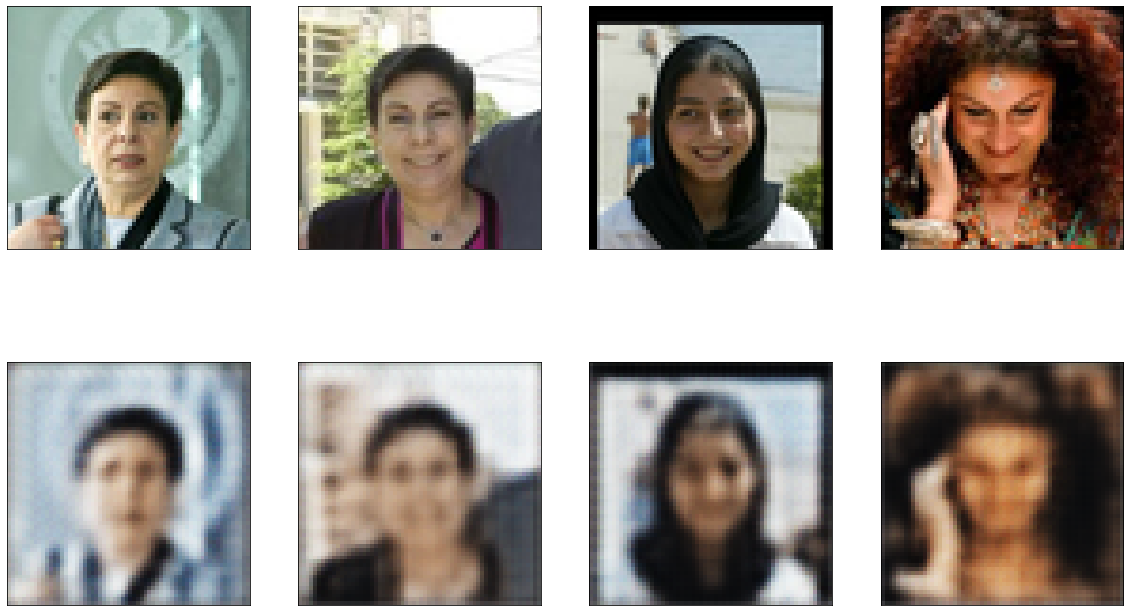

Running epoch 46/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:45 - loss: 1.0098 - acc: 0.727 - ETA: 1:40 - loss: 1.0097 - acc: 0.724 - ETA: 1:35 - loss: 1.0071 - acc: 0.717 - ETA: 1:31 - loss: 1.0079 - acc: 0.723 - ETA: 1:28 - loss: 1.0053 - acc: 0.717 - ETA: 1:25 - loss: 1.0062 - acc: 0.718 - ETA: 1:22 - loss: 1.0068 - acc: 0.709 - ETA: 1:20 - loss: 1.0065 - acc: 0.711 - ETA: 1:17 - loss: 1.0051 - acc: 0.705 - ETA: 1:15 - loss: 1.0055 - acc: 0.705 - ETA: 1:12 - loss: 1.0052 - acc: 0.699 - ETA: 1:10 - loss: 1.0049 - acc: 0.701 - ETA: 1:07 - loss: 1.0047 - acc: 0.696 - ETA: 1:04 - loss: 1.0051 - acc: 0.697 - ETA: 1:01 - loss: 1.0043 - acc: 0.692 - ETA: 59s - loss: 1.0047 - acc: 0.692 - ETA: 56s - loss: 1.0050 - acc: 0.69 - ETA: 53s - loss: 1.0052 - acc: 0.68 - ETA: 51s - loss: 1.0050 - acc: 0.68 - ETA: 49s - loss: 1.0052 - acc: 0.68 - ETA: 46s - loss: 1.0054 - acc: 0.68 - ETA: 43s - loss: 1.0053 - acc: 0.68 - ETA: 41s - loss: 1.0047 - acc: 0.68 - ETA: 38s - loss: 1.0

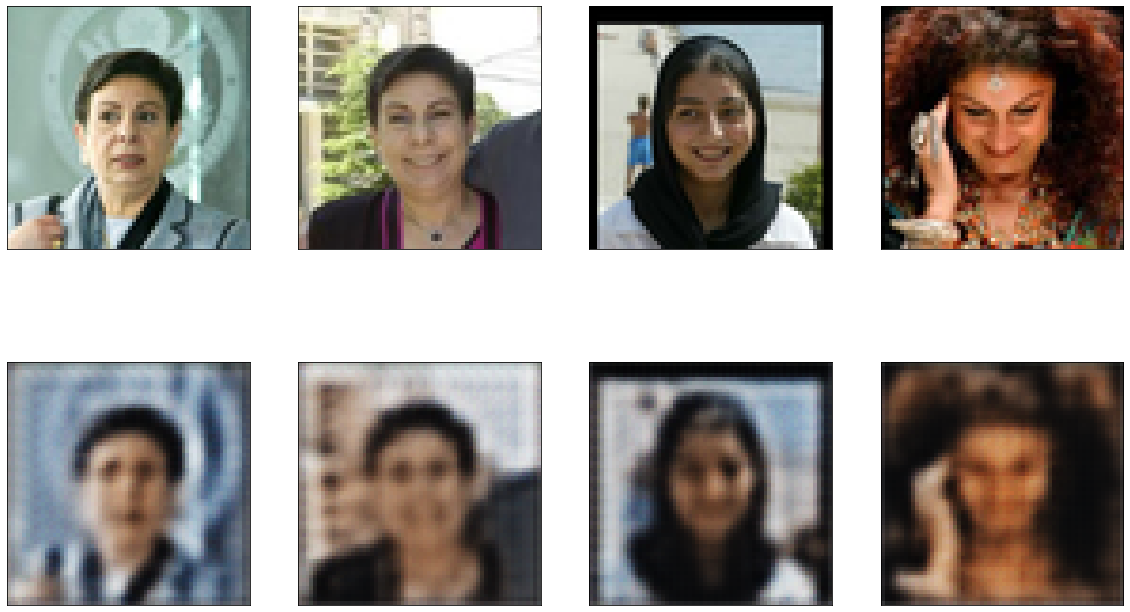

Running epoch 47/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:47 - loss: 1.0045 - acc: 0.733 - ETA: 1:40 - loss: 1.0080 - acc: 0.730 - ETA: 1:34 - loss: 1.0088 - acc: 0.724 - ETA: 1:32 - loss: 1.0091 - acc: 0.720 - ETA: 1:29 - loss: 1.0093 - acc: 0.719 - ETA: 1:27 - loss: 1.0095 - acc: 0.718 - ETA: 1:23 - loss: 1.0096 - acc: 0.719 - ETA: 1:21 - loss: 1.0098 - acc: 0.721 - ETA: 1:18 - loss: 1.0090 - acc: 0.720 - ETA: 1:15 - loss: 1.0091 - acc: 0.720 - ETA: 1:12 - loss: 1.0084 - acc: 0.719 - ETA: 1:10 - loss: 1.0086 - acc: 0.719 - ETA: 1:07 - loss: 1.0087 - acc: 0.718 - ETA: 1:04 - loss: 1.0084 - acc: 0.718 - ETA: 1:02 - loss: 1.0083 - acc: 0.719 - ETA: 59s - loss: 1.0079 - acc: 0.718 - ETA: 56s - loss: 1.0076 - acc: 0.71 - ETA: 54s - loss: 1.0078 - acc: 0.72 - ETA: 51s - loss: 1.0079 - acc: 0.72 - ETA: 49s - loss: 1.0076 - acc: 0.72 - ETA: 46s - loss: 1.0077 - acc: 0.72 - ETA: 44s - loss: 1.0077 - acc: 0.72 - ETA: 41s - loss: 1.0078 - acc: 0.72 - ETA: 38s - loss: 1.0

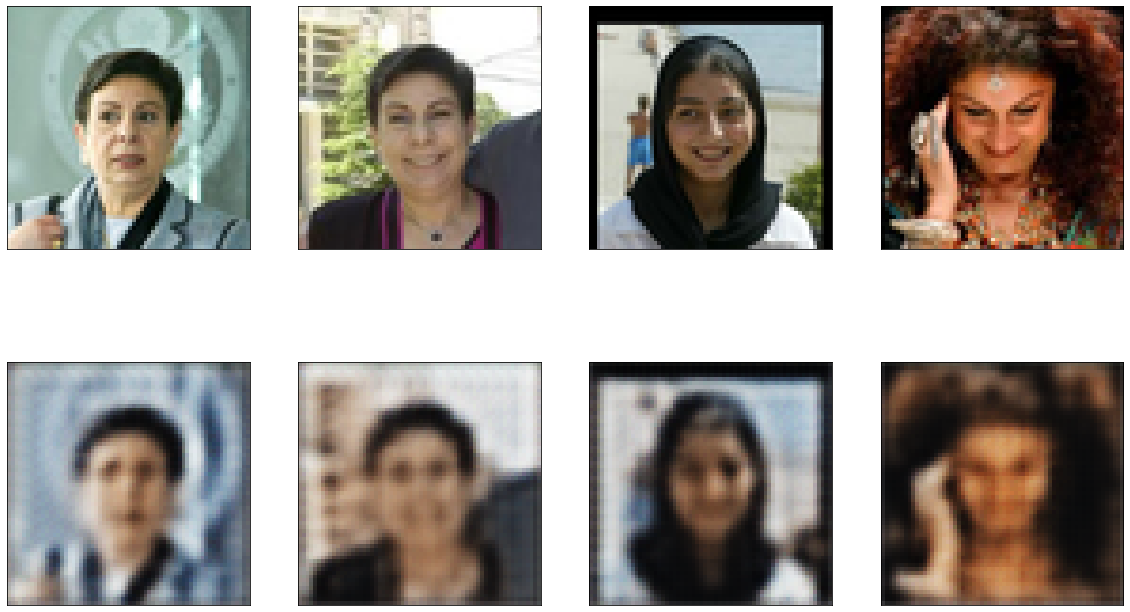

Running epoch 48/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:49 - loss: 1.0088 - acc: 0.724 - ETA: 1:44 - loss: 1.0087 - acc: 0.727 - ETA: 1:41 - loss: 1.0061 - acc: 0.723 - ETA: 1:37 - loss: 1.0050 - acc: 0.728 - ETA: 1:33 - loss: 1.0058 - acc: 0.727 - ETA: 1:29 - loss: 1.0064 - acc: 0.719 - ETA: 1:26 - loss: 1.0069 - acc: 0.719 - ETA: 1:22 - loss: 1.0072 - acc: 0.720 - ETA: 1:19 - loss: 1.0075 - acc: 0.722 - ETA: 1:16 - loss: 1.0076 - acc: 0.723 - ETA: 1:13 - loss: 1.0071 - acc: 0.724 - ETA: 1:11 - loss: 1.0073 - acc: 0.723 - ETA: 1:08 - loss: 1.0076 - acc: 0.724 - ETA: 1:05 - loss: 1.0073 - acc: 0.725 - ETA: 1:03 - loss: 1.0075 - acc: 0.724 - ETA: 1:00 - loss: 1.0077 - acc: 0.724 - ETA: 58s - loss: 1.0074 - acc: 0.725 - ETA: 55s - loss: 1.0076 - acc: 0.72 - ETA: 52s - loss: 1.0077 - acc: 0.72 - ETA: 50s - loss: 1.0077 - acc: 0.72 - ETA: 47s - loss: 1.0079 - acc: 0.72 - ETA: 44s - loss: 1.0076 - acc: 0.72 - ETA: 42s - loss: 1.0077 - acc: 0.72 - ETA: 39s - loss: 1

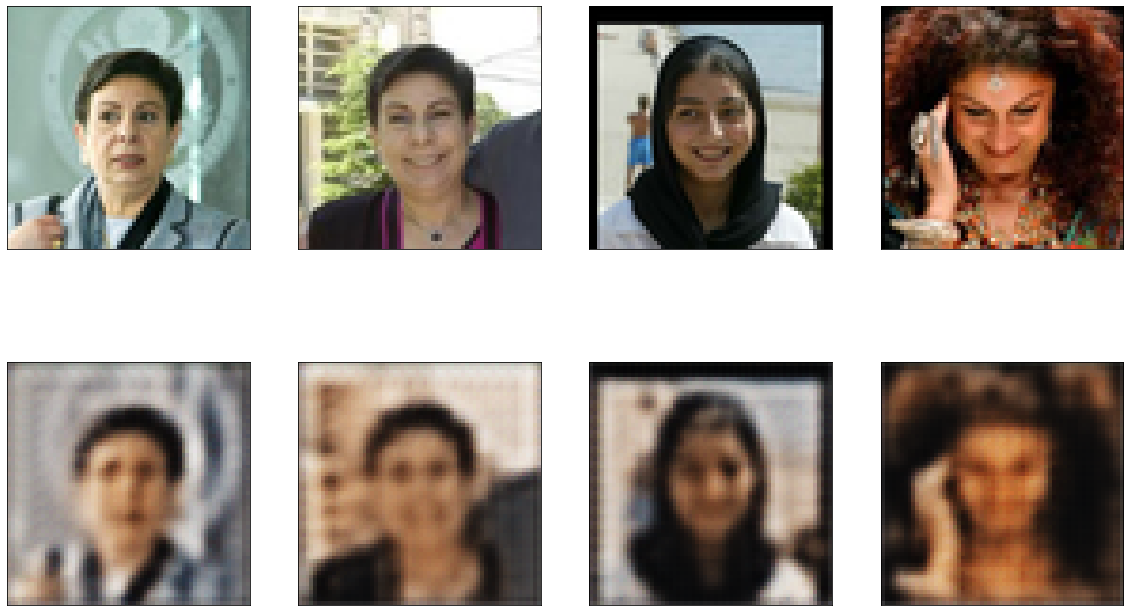

Running epoch 49/50
Epoch 1/1
5000/5000 [==============================] - ETA: 2:01 - loss: 1.0108 - acc: 0.699 - ETA: 1:46 - loss: 1.0023 - acc: 0.690 - ETA: 1:40 - loss: 1.0023 - acc: 0.706 - ETA: 1:36 - loss: 1.0015 - acc: 0.695 - ETA: 1:32 - loss: 1.0030 - acc: 0.701 - ETA: 1:30 - loss: 1.0040 - acc: 0.700 - ETA: 1:29 - loss: 1.0036 - acc: 0.702 - ETA: 1:26 - loss: 1.0042 - acc: 0.700 - ETA: 1:23 - loss: 1.0047 - acc: 0.704 - ETA: 1:20 - loss: 1.0044 - acc: 0.706 - ETA: 1:16 - loss: 1.0048 - acc: 0.711 - ETA: 1:13 - loss: 1.0051 - acc: 0.714 - ETA: 1:10 - loss: 1.0051 - acc: 0.715 - ETA: 1:07 - loss: 1.0055 - acc: 0.713 - ETA: 1:04 - loss: 1.0052 - acc: 0.712 - ETA: 1:01 - loss: 1.0056 - acc: 0.714 - ETA: 59s - loss: 1.0049 - acc: 0.710 - ETA: 56s - loss: 1.0053 - acc: 0.71 - ETA: 53s - loss: 1.0051 - acc: 0.71 - ETA: 51s - loss: 1.0053 - acc: 0.71 - ETA: 48s - loss: 1.0055 - acc: 0.71 - ETA: 45s - loss: 1.0056 - acc: 0.71 - ETA: 42s - loss: 1.0055 - acc: 0.71 - ETA: 40s - loss: 1

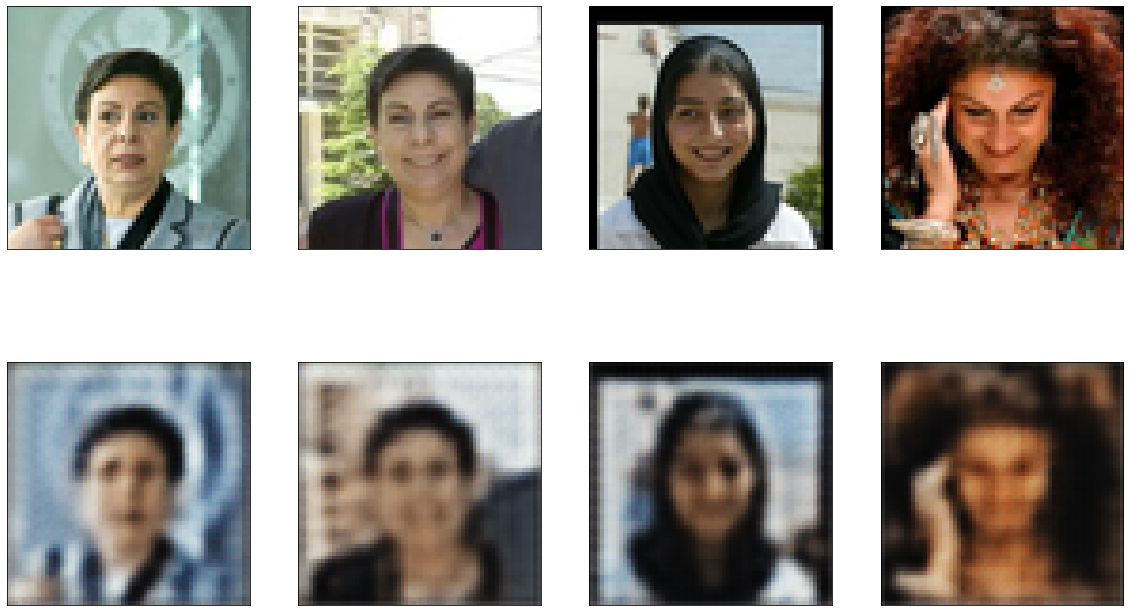

Running epoch 50/50
Epoch 1/1
5000/5000 [==============================] - ETA: 1:50 - loss: 0.9944 - acc: 0.736 - ETA: 1:41 - loss: 0.9982 - acc: 0.733 - ETA: 1:38 - loss: 1.0015 - acc: 0.729 - ETA: 1:37 - loss: 1.0035 - acc: 0.729 - ETA: 1:33 - loss: 1.0031 - acc: 0.725 - ETA: 1:29 - loss: 1.0030 - acc: 0.725 - ETA: 1:26 - loss: 1.0033 - acc: 0.723 - ETA: 1:23 - loss: 1.0040 - acc: 0.723 - ETA: 1:20 - loss: 1.0038 - acc: 0.724 - ETA: 1:17 - loss: 1.0036 - acc: 0.725 - ETA: 1:14 - loss: 1.0034 - acc: 0.725 - ETA: 1:12 - loss: 1.0032 - acc: 0.723 - ETA: 1:09 - loss: 1.0036 - acc: 0.722 - ETA: 1:06 - loss: 1.0040 - acc: 0.724 - ETA: 1:04 - loss: 1.0043 - acc: 0.724 - ETA: 1:02 - loss: 1.0042 - acc: 0.724 - ETA: 1:00 - loss: 1.0046 - acc: 0.724 - ETA: 57s - loss: 1.0044 - acc: 0.724 - ETA: 54s - loss: 1.0047 - acc: 0.72 - ETA: 51s - loss: 1.0050 - acc: 0.72 - ETA: 48s - loss: 1.0053 - acc: 0.72 - ETA: 46s - loss: 1.0055 - acc: 0.72 - ETA: 43s - loss: 1.0057 - acc: 0.72 - ETA: 40s - loss:

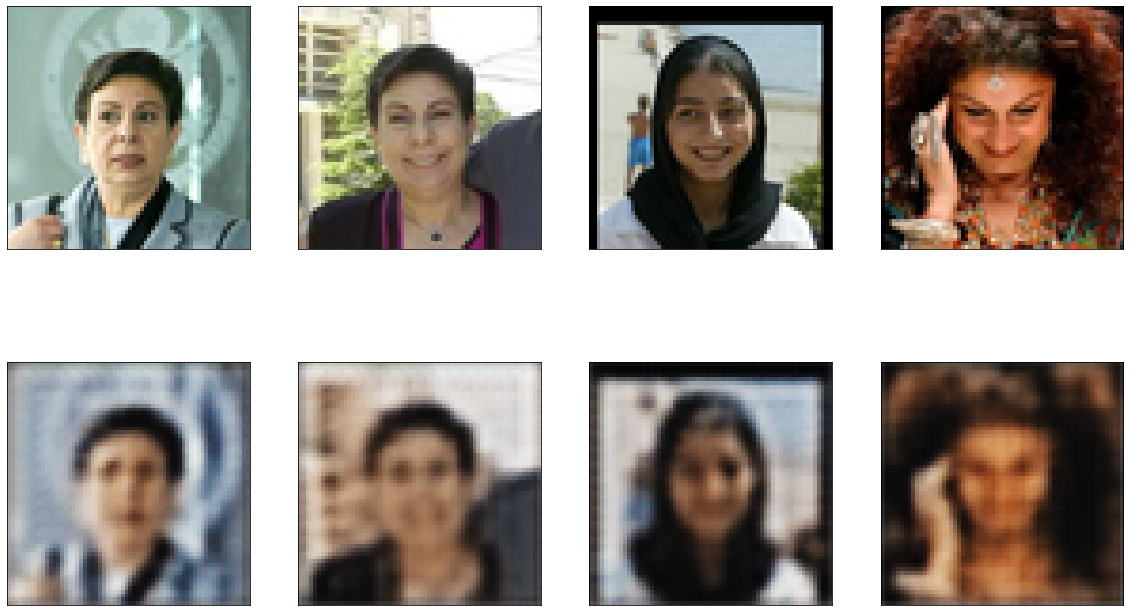

In [13]:
from keras.callbacks import CSVLogger
TRAINING_LOGS_FILE = 'auto-classif-1-50ep.csv'
epochs=50
history = {}
for j in range(epochs):
    print(f'Running epoch {j+1}/{epochs}')
    doggifier.fit(x_train, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True,
                callbacks=[ CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")])
    epoch_number = j+1
    history[epoch_number] = doggifier.history.history
    decoded_imgs = doggifier.predict(x_test)
    
    n = 4
    plt.figure(figsize=(20, 12))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(decoded_imgs[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    fig_name = f'fig_epoch{j}-clasif-al1-50ep.png'
    plt.savefig(fig_name)
    plt.show()

In [ ]:
TRAINING_LOGS_FILE = 'auto_resnet-001-50ep.csv'
epochs=50
history = {}
for j in range(epochs):
    print(f'Running epoch {j+1}/{epochs}')
    doggifier.fit(x_train, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True,
                callbacks=[ CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")])
    epoch_number = j+1
    history[epoch_number] = doggifier.history.history
    decoded_imgs = doggifier.predict(x_test)
    
    n = 4
    plt.figure(figsize=(20, 12))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(decoded_imgs[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    fig_name = f'fig_epoch{j}-res-again-50epb-001.png'
    plt.savefig(fig_name)
    plt.show()

In [ ]:
doggifier.save('doggif_res-again-scd50-0001.h5')

* Cambiar de perro, cambiar alpha, agregar ts.print, agrandar foto original
* resb fue primer autoencoder posta con resnet
* resc es alpha=.1, y corriendo despues de 5 epocas de resb
* res-again es de nuevo lo mismo, desde cero con alpha .5 y tratando de hacer el print


In [ ]:
img.shape

In [ ]:
img = img.astype('float32') / 255.
img.shape

In [ ]:
decoded_img = doggifier.predict(img)


In [ ]:
# import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(img[i+20].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1 + n)
    plt.imshow(decoded_img[i+20].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
imgs2 = get_training_data('../data/test2/human')

In [ ]:
imgs2 = imgs2.astype('float32') / 255.
imgs2.shape

In [ ]:
decoded2 = doggifier.predict(imgs2)

In [ ]:
decoded2.shape

In [ ]:
n = 4
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs2[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1 + n)
    plt.imshow(decoded2[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs2 = doggifier.predict(x_test)

In [ ]:
decoded_imgs2.shape

In [ ]:
n = 4
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i+100].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1 + n)
    plt.imshow(decoded_imgs2[i+100].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
imgs3 = get_training_data('../data/resnet')

In [ ]:
decoded3 = doggifier.predict(imgs3)

In [ ]:
n = 3
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs3[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1 + n)
    plt.imshow(decoded3[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# to see how the original autoencoder did the imgs:

In [ ]:
from keras.models import load_model
auto = load_model ('autoencoder-human-100-color-copy3.h5')

In [ ]:
decoded2 = auto.predict(x_test[0:20])

In [ ]:
# import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i+10].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1 + n)
    plt.imshow(decoded2[i+10].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

auto.compile(optimizer='adadelta',
              loss=custom_loss(decoded), # Call the loss function with the selected layer
              metrics=['accuracy'])

In [ ]:
epochs=5
history = {}
for j in range(epochs):
    print(f'Running epoch {j+1}/{epochs}')
    auto.fit(x_train, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True)
#                 validation_data=(x_val, x_val))
    epoch_number = j+1
    history[epoch_number] = auto.history.history
    decoded_imgs = auto.predict(x_test)
    
    n = 4
    plt.figure(figsize=(20, 12))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(decoded_imgs[i].reshape(64, 64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    fig_name = f'fig_epoch{j}-load_auto_custom_afterb.png'
    plt.savefig(fig_name)
    plt.show()

In [ ]:
x_test[100:104].shape

In [ ]:
import os 

def get_training_data(datafolder):
        print("Loading training data...")

        training_data = []
        #Finds all files in datafolder
        foldernames = os.listdir(datafolder)
#         print(foldernames)
        for foldername in tqdm(foldernames):
            folder_path = os.path.join(datafolder, foldername)
            filenames = os.listdir(folder_path)
            folder = foldername
            for filename in tqdm(filenames):
                
                #Combines folder name and file name.
                path = os.path.join(datafolder,folder, filename)
                print(path)
                
                #Opens an image as an Image object.
                image = Image.open(path)
                
                #Resizes to a desired size.
                image = image.resize((64,64),Image.ANTIALIAS)
                
                #Creates an array of pixel values from the image.
                pixel_array = np.asarray(image)
#                 print(type(pixel_array))
                print(pixel_array.shape)
                training_data.append(pixel_array)

        #training_data is converted to a numpy array
        training_data = np.asarray(training_data)
#         training_data = np.reshape(training_data,(-1,64,64,1))
        return training_data

In [ ]:
img = get_training_data('../data/test2/dog')

In [ ]:
img.shape

In [ ]:
np.save('img-color.npy',img)

In [ ]:
ii = np.load('img-color.npy')
ii.shape